<!--Header-->
<div>
    <div class="row" style="color: #4D4D4D;font-size: 15px;padding-bottom: 20px">
        <div class="col-md-7">
            <img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg" alt="Logo UOC" class="img-responsive" style="margin:20px 0px 0px">
        </div>
        <div class="col-md-5">
            <p style='margin: 0; padding-top: 22px; text-align:right;'>ML en cancelaciones de reservas online de hoteles</p>
            <p style="margin: 0; text-align:right;">Máster universitario en Ciencia de datos (<i>Data science</i>)</p>
            <p style="margin: 0; text-align:right; padding-button: 100px;">Estudios de Informática, Multimedia y Telecomunicación</p>
            <div style="text-align:left;margin-top: 5px;"></div>
        </div>
    </div>
    <div class="row" style="background: #66FFFF;padding: 10px 20px;">
        <div class="col-md-6">
            <div>TFM</div>
        </div>
        <div class="col-md-6">
            <div style="text-align:right;">Autor: Mikel Urrutxi Sagasta<span style="margin-left: 30px;">Tutor: Jesús López Lobo</span></div>
        </div>
    </div>
</div>
<!--/Header-->

# **ML en cancelaciones de reservas online de hoteles**

El avance de la tecnología y el crecimiento de datos en tiempo real han llevado a la necesidad de desarrollar nuevas técnicas y modelos en el campo de la inteligencia artificial. La IA tradicional sigue un proceso estructurado que requiere grandes volúmenes de datos y tiempo para entrenamiento, pero no puede funcionar eficazmente en un mundo donde los datos cambian constantemente y se requieren respuestas casi instantáneas. La solución radica en el análisis de datos en tiempo real y en la creación de algoritmos y arquitecturas que permitan a la IA aprender de forma incremental cada vez que se disponga de nuevos datos.

El aprendizaje automático en línea presenta el problema del *concept drift* cuando el entorno y los datos cambian constantemente, lo que requiere el desarrollo de algoritmos y arquitecturas que permitan el aprendizaje incremental y el manejo del *concept drift*. La analítica de datos en tiempo real es esencial para mantener el modelo actualizado y adaptado a los cambios del entorno, mejorando su precisión y rendimiento.

Se ha desarrollado un proyecto para prever y anticiparse a los eventos de cancelación de reservas en páginas web de reservas de hoteles. El objetivo principal es predecir qué perfil de cliente es más propenso a cancelar sus reservas y cuál no, a través del análisis de la demanda de los clientes con un conjunto de datos. Además, se han utilizado métodos diferentes a los habituales para abordar el efecto del *concept drift* y mantener la efectividad del modelo a medida que los datos cambian.

## Índice

* Carga de librerías
* 1. Carga del conjunto de datos
    + 1.1. Descripción de las variables  
    + 1.2. Descripción estadística de las variables númericas  
    + 1.3. Valores nulos  
    + 1.4. Análisis de la variable 'booking_status'  
  
* 2. Análisis de datos
    + 2.1. Análisis exploratorio de datos    
        * 2.1.1. Análisis de las variables categóricas  
        * 2.1.2. Análisis de variables numéricas  
        * 2.1.3. Análisis de las variables en relación a 'booking_status'  
        * 2.1.4. Análisis entre variables   
        * 2.1.5. Conclusiones sobre las variables         
    + 2.2. Preprocesamiento de datos 
        * 2.2.1. Creación de nuevas variables
        * 2.2.2. Ajuste y transformación de variables
        * 2.2.3. Correlación de las variables
        * 2.2.4. Reducción de dimensionalidad
    + 2.3. Conclusiones del análisis de datos
  
* 3. Entrenamiento de un modelo    
    + 3.1. Conclusiones de los modelos desarrollados  
    + 3.2. Importancia de las variables del modelo  
    + 3.3. Predicción de nuevos casos  
  
* 4. Concept drift 
    + 4.1. Diferentes tipos de detectores    
    + 4.2. Drift basado en la distribución del tiempo   
        * 4.2.1. Visualización del concept drift: Método ADWIN  
        * 4.2.2. Visualización del concept drift: Método PageHinkley  
        * 4.2.3. Visualización del concept drift: Método KSWIN  
    + 4.3. Cambio en las características  
        * 4.3.1. Eliminación de variables importantes   
        * 4.3.2. Intercambio de dos variables importantes  
            + 4.3.2.1. Visualización del concept drift: Método ADWIN  
            + 4.3.2.2. Visualización del concept drift: Método PageHinkley  
            + 4.3.2.3. Visualización del concept drift: Método KSWIN  

* 5. Estrategias de adaptación
    + 5.1. Adaptación para el drift basado en la distribución del tiempo
        * 5.1.1. Adaptive Random Forest
        * 5.1.2. Streaming Random Patches
        * 5.1.3. Comparación de modelos
    + 5.2. Adaptación para el drift del cambio de las características
        * 5.2.1. Adaptive Random Forest
        * 5.2.2. Streaming Random Patches
        * 5.2.3. Comparación de modelos

* 6. Conclusiones generales

## Carga de librerías

In [1]:
import time
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.metrics import accuracy_score, confusion_matrix, make_scorer, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# Concept drift
from river.drift import ADWIN, KSWIN, PageHinkley
from river import metrics
from river import stream
from river import forest
from river import ensemble

%matplotlib inline

# **1. Carga del conjunto de datos**

In [2]:
# Cargar datos desde un archivo CSV
df = pd.read_csv('HotelReservations.csv')

## 1.1. Descripción de las variables

In [3]:
# Ver información básica del DataFrame
df.info()

# Ver las primeras filas de los datos
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


- Booking_ID: Identificador único de cada reserva.
- no_of_adults: Número de adultos.
- no_of_children: Número de niños.
- no_of_weekend_nights: Número de noches de fin de semana (sábado o domingo) que el huésped se alojó o reservó para alojarse en el hotel.
- no_of_week_nights: Número de noches de la semana (de lunes a viernes) que el huésped se alojó o reservó para alojarse en el hotel.
- type_of_meal_plan: Tipo de plan de comidas reservado por el cliente - (Not Selected, Meal Plan 1, Meal Plan 2, Meal Plan 3)
- required_car_parking_space: ¿Necesita el cliente una plaza de aparcamiento? (0 - No, 1- Sí)
- room_type_reserved: Tipo de habitación reservada por el cliente. Los valores son cifrados (codificados) por INN Hotels - (Room_Type 1, Room_Type 2, Room_Type 3, Room_Type 4, Room_Type 5, Room_Type 6, Room_Type 7)
- lead_time: Número de días entre la fecha de reserva y la fecha de llegada.
- arrival_year: Año de la fecha de llegada
- arrival_month: Mes de la fecha de llegada
- arrival_date: Día de la fecha de llegada
- market_segment_type: Designación del segmento de mercado - (Online, Offline, Corporate, Complementary, Aviation)
- repeated_guest: ¿El cliente repite? (0 - No, 1- Sí)
- no_of_previous_cancellations: Número de reservas anteriores canceladas por el cliente antes de la reserva actual.
- no_of_previous_bookings_not_canceled: Número de reservas anteriores no canceladas por el cliente antes de la reserva actual.
- avg_price_per_room: Precio medio por día de reserva; los precios de las habitaciones son dinámicos. (en euros)
- no_of_special_requests: Número total de peticiones especiales realizadas por el cliente (por ejemplo, piso alto, vistas desde la habitación, etc.)
- booking_status: Variable que indica si la reserva fue cancelada o no - (not_canceled, canceled)

## 1.2. Descripción estadística de las variables númericas

In [4]:
# Obtener estadísticas descriptivas de las variables númericas
print('Descripción estadística de las variables numéricas')
df.describe().transpose()

Descripción estadística de las variables numéricas


,count,mean,std,min,25%,50%,75%,max
no_of_adults,36275.0,1.844962,0.518715,0.0,2.0,2.00,2.0,4.0
no_of_children,36275.0,0.105279,0.402648,0.0,0.0,0.00,0.0,10.0
no_of_weekend_nights,36275.0,0.810724,0.870644,0.0,0.0,1.00,2.0,7.0
no_of_week_nights,36275.0,2.204300,1.410905,0.0,1.0,2.00,3.0,17.0
required_car_parking_space,36275.0,0.030986,0.173281,0.0,0.0,0.00,0.0,1.0
lead_time,36275.0,85.232557,85.930817,0.0,17.0,57.00,126.0,443.0
arrival_year,36275.0,2017.820427,0.383836,2017.0,2018.0,2018.00,2018.0,2018.0
arrival_month,36275.0,7.423653,3.069894,1.0,5.0,8.00,10.0,12.0
arrival_date,36275.0,15.596995,8.740447,1.0,8.0,16.00,23.0,31.0
repeated_guest,36275.0,0.025637,0.158053,0.0,0.0,0.00,0.0,1.0


- no_of_adults: De media las reservas suelen ser de dos adultos.
- no_of_children: De media estas reservas suelen ser sin niños.
- no_of_weekend_nights: Los clientes suelen reservar de media una noche de fin de semana.
- no_of_week_nights: Los clientes suelen reservar de media dos noches entre semana.
- required_car_parking_space: Los huéspedes no suelen reservar un aparcamiento del coche.
- lead_time: Los clientes suelen hacer la reserva de media con 85 días de antelación, pero hay diferentes comportamientos, ya que el valor de la desviación estándar es muy alta. Esto quiere decir que los clientes suelen reservar con mucha antelación o con a pocos días de la llegada al hotel.
- arrival_year: El año que más llegadas hubo de media fue 2018.
- arrival_month: El mes que más llegadas al hotel se hicieron de media fue julio, pero según el valor de la desviación estándar se podría decir que sería entre junio y septiembre.
- arrival_date: El día que más llegadas hubo de media fue a mediados de mes, día 16. Pero, las llegadas pasaron durante todo el mes segun el valor de la desviación estándar.
- repeated_guest: De media casi ningún huésped ha repetido.
- no_of_previous_cancellations: Casi ningún cliente ha cancelado alguna reserva previamente.
- no_of_previous_bookings_not_canceled: Casi la mayoria de huéspedes no han cancelado anteriormente una reserva antes de la reserva actual.
- avg_price_per_room: El valor medio de un alojamiento es de 103'42€, pero los datos están bastante dispersos alrededor de la media, es decir, que hay muchos valores por debajo y por encima de la media.
- no_of_special_requests: Casi ningún huésped hace peticiones especiales sobre el alojamiento.

In [5]:
# Obtener estadísticas descriptivas de las variables númericas
print('Descripción estadística de las variables categóricas')
df[['Booking_ID', 'type_of_meal_plan', 'room_type_reserved', 'market_segment_type', 'booking_status']].astype('object').describe().transpose()

Descripción estadística de las variables categóricas


,count,unique,top,freq
Booking_ID,36275,36275,INN00001,1
type_of_meal_plan,36275,4,Meal Plan 1,27835
room_type_reserved,36275,7,Room_Type 1,28130
market_segment_type,36275,5,Online,23214
booking_status,36275,2,Not_Canceled,24390


- Booking_ID: La tabla contiene 36275 reservas distintas, cada una con su Booking_ID único.
- type_of_meal_plan: Indica el plan de comida reservado, con cuatro opciones distintas y la mayoría de las reservas (27835) eligieron "Meal Plan 1". 
- room_type_reserved: Indica el tipo de habitación reservada, con siete opciones distintas y la mayoría de las reservas (28130) eligieron "Room_Type 1".
- market_segment_type: Indica el tipo de segmento de mercado, con cinco opciones distintas y la mayoría de las reservas (23214) fueron realizadas a través de canales en línea.
- booking_status: Indica si la reserva fue cancelada o no, con dos opciones distintas y la mayoría de las reservas (24390) no fueron canceladas.

## 1.3. Valores nulos

In [6]:
# Verificar si hay valores faltantes en el DataFrame
print(df.isnull().sum())

# Eliminar filas o columnas con valores faltantes
df = df.dropna()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64


No hay ningún valor nulo.

## 1.4. Análisis de la variable 'booking_status'

booking_status
Not_Canceled    24390
Canceled        11885
Name: count, dtype: int64


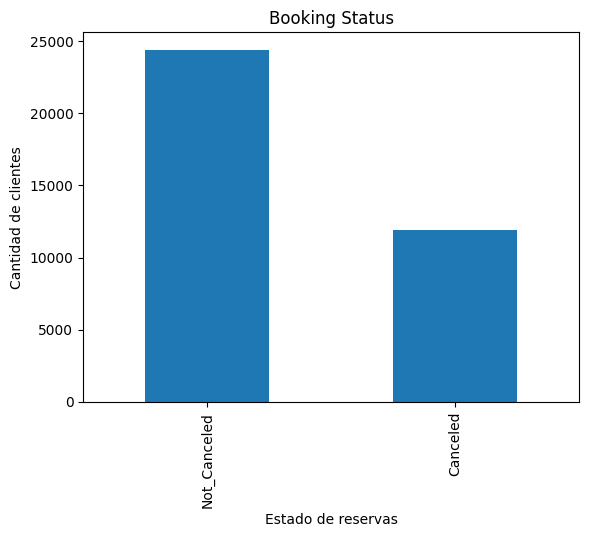

In [7]:
# Contar los valores únicos en una columna
booking_status_vc = df['booking_status'].value_counts()
print(booking_status_vc)

# Crear un histograma de una columna
booking_status_vc.plot.bar()

plt.title('Booking Status')
plt.xlabel('Estado de reservas')
plt.ylabel('Cantidad de clientes')

# Mostrar el gráfico
plt.show()

"booking_status" es una variable que indica el estado de las reservas de este conjunto de datos. En este caso, los datos muestran que se han registrado 36275 reservas en total. De esas reservas, 24390 no han sido canceladas y 11885 han sido canceladas.

Es importante destacar que esta información por sí sola no nos da la razón por la cual se han cancelado algunas de las reservas, pero puede ser útil para realizar análisis posteriores. En general, la variable "booking_status" puede ser una herramienta útil para cualquier empresa o entidad que maneje reservas de cualquier tipo, ya que permite hacer un seguimiento del éxito o fracaso de las mismas y tomar decisiones en consecuencia.

# **2. Análisis de los datos**
## 2.1. Análisis exploratorio de datos

El análisis de datos es una herramienta valiosa para entender y mejorar diversos procesos, y la industria hotelera no es una excepción. Una de las áreas donde el análisis de datos ha tenido un gran impacto es en la gestión de reservas de alojamiento. Con el creciente número de plataformas de reservas de hoteles en línea, se ha vuelto cada vez más importante entender los patrones de comportamiento de los clientes y anticiparse a posibles problemas, como cancelaciones de reservas.

En este sentido, el análisis de datos puede ayudar a los hoteles a prever las cancelaciones de reservas, identificar patrones de comportamiento de los clientes y tomar medidas para reducir su impacto. En particular, el análisis de datos puede ayudar a predecir qué perfil de cliente es más propenso a cancelar su reserva y en qué momento, lo que puede ser útil para optimizar la gestión de inventario, ajustar las políticas de cancelación y mejorar la satisfacción del cliente.

En este apartado, se abordará el análisis de datos aplicado a la cancelación de reservas en línea de hoteles, con un enfoque en cómo los datos pueden ser utilizados para predecir cancelaciones y reducir su impacto. Se presentarán los principales resultados y conclusiones de un estudio realizado sobre la base de datos de reservas de un hotel, y se discutirán las implicaciones y posibles aplicaciones de los hallazgos.

### 2.1.1. Análisis de las variables categóricas

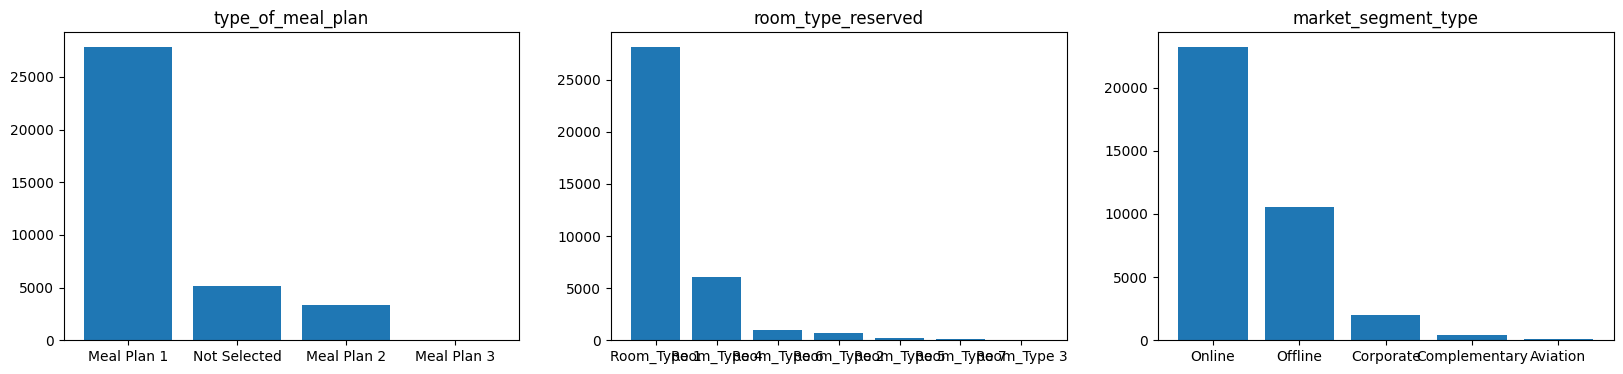

In [8]:
# Representación de las variables categóricas
fig, ax = plt.subplots(1, 3, figsize = (20, 4))

ax[0].bar(df['type_of_meal_plan'].value_counts().index, df['type_of_meal_plan'].value_counts())
ax[1].bar(df['room_type_reserved'].value_counts().index, df['room_type_reserved'].value_counts())
ax[2].bar(df['market_segment_type'].value_counts().index, df['market_segment_type'].value_counts())

ax[0].set_title('type_of_meal_plan')
ax[1].set_title('room_type_reserved')
ax[2].set_title('market_segment_type')

plt.show()

Se han representado las variables categóricas "type_of_meal_plan", "room_type_reserved" y "market_segment_type". No se ha representado "Booking_ID", ya que esta variable tiene 36275 registros diferentes, por lo que no se puede sacar ninguna conclusión y no es muy válido para el análisis de datos.

- type_of_meal_plan: Por mucha diferencia la mayoría de los huéspedes ha contratado 'Meal Plan 1'. Después, los tipos de comidas elegidos han sido 'Not Selected' o 'Meal Plan 2'. Por último, está 'Meal Plan 3' que casi nadie lo ha contratado.
- room_type_reserved: Los tipos de habitaciones más reservados son el 1 y el 4. Las reservas de las demás habitaciones es muy inferior que las del 1 y 4, para ver la gran diferencia la suma de reservas del tipo de habitaciones restantes no llega ni a la mitad del valor de las reservas de las habitaciones tipo 4, que son el segundo valor más alto de reservas.  
- market_segment_type: La mayoría de las reservas están dirigidas al mercado online. Después la segunda mayor cantidad de reservas ha venido del mercado offline. Todas las demás reservas han venido desde 'Corporate', 'Complementary' o 'Aviation' que son mercados inferiores comparados con los dos mercados mencionados.

### 2.1.2. Análisis de variables numéricas

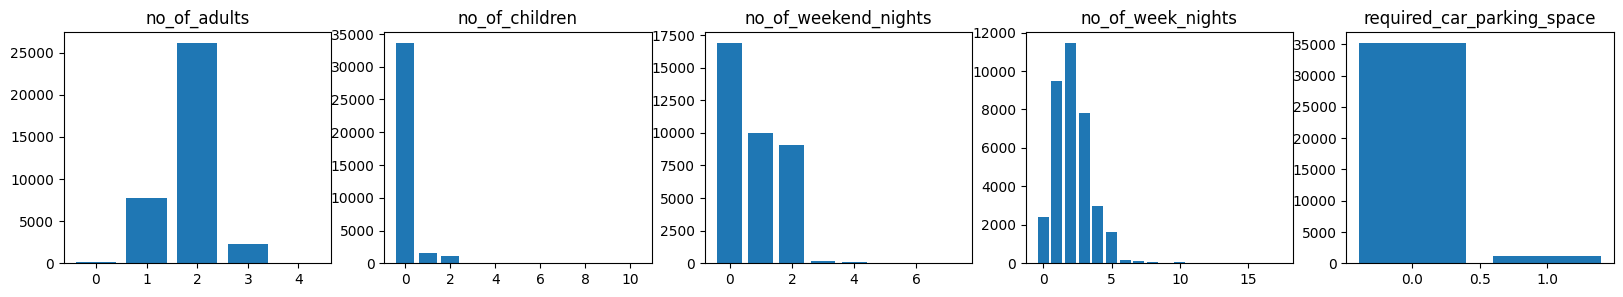

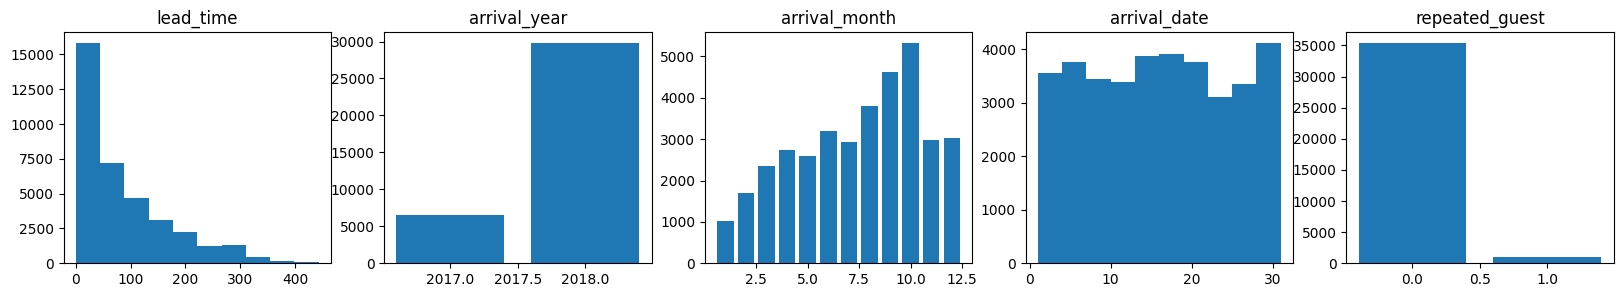

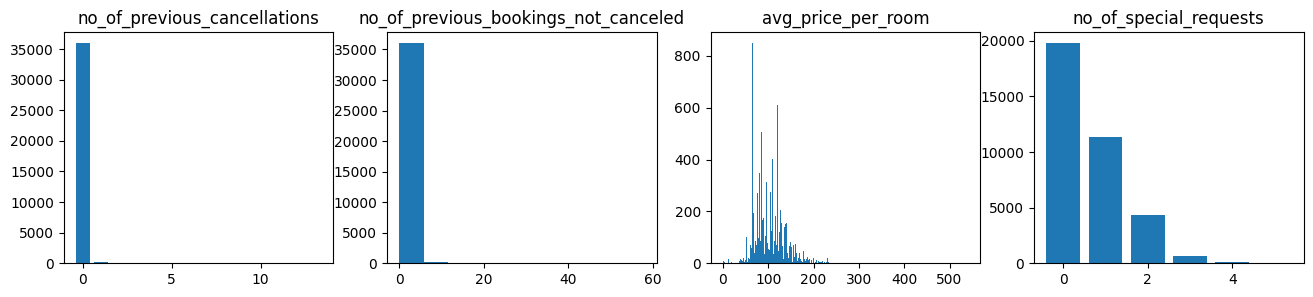

In [9]:
# Representación de las variables numéricas
fig1, ax1 = plt.subplots(1, 5, figsize = (20, 3))
fig2, ax2 = plt.subplots(1, 5, figsize = (20, 3))
fig3, ax3 = plt.subplots(1, 4, figsize = (16, 3))

ax1[0].bar(df['no_of_adults'].value_counts().index, df['no_of_adults'].value_counts())
ax1[1].bar(df['no_of_children'].value_counts().index, df['no_of_children'].value_counts())
ax1[2].bar(df['no_of_weekend_nights'].value_counts().index, df['no_of_weekend_nights'].value_counts())
ax1[3].bar(df['no_of_week_nights'].value_counts().index, df['no_of_week_nights'].value_counts())
ax1[4].bar(df['required_car_parking_space'].value_counts().index, df['required_car_parking_space'].value_counts())
ax2[0].hist(df['lead_time'])
ax2[1].bar(df['arrival_year'].value_counts().index, df['arrival_year'].value_counts())
ax2[2].bar(df['arrival_month'].value_counts().index, df['arrival_month'].value_counts())
ax2[3].hist(df['arrival_date'])
ax2[4].bar(df['repeated_guest'].value_counts().index, df['repeated_guest'].value_counts())
ax3[0].bar(df['no_of_previous_cancellations'].value_counts().index, df['no_of_previous_cancellations'].value_counts())
ax3[1].hist(df['no_of_previous_bookings_not_canceled'])
ax3[2].bar(df['avg_price_per_room'].value_counts().index, df['avg_price_per_room'].value_counts())
ax3[3].bar(df['no_of_special_requests'].value_counts().index, df['no_of_special_requests'].value_counts())


ax1[0].set_title('no_of_adults')
ax1[1].set_title('no_of_children')
ax1[2].set_title('no_of_weekend_nights')
ax1[3].set_title('no_of_week_nights')
ax1[4].set_title('required_car_parking_space')
ax2[0].set_title('lead_time')
ax2[1].set_title('arrival_year')
ax2[2].set_title('arrival_month')
ax2[3].set_title('arrival_date')
ax2[4].set_title('repeated_guest')
ax3[0].set_title('no_of_previous_cancellations')
ax3[1].set_title('no_of_previous_bookings_not_canceled')
ax3[2].set_title('avg_price_per_room')
ax3[3].set_title('no_of_special_requests')

plt.show()

Muchos de estos gráficos ratifican los datos estadísticos que se han analizado en el apartado anterior. Como las variables 'no_of_adults', 'no_of_children', 'no_of_week_nights', 'required_car_parking_space', 'arrival_year', 'arrival_date', 'repeated_guest', 'no_of_previous_cancellations' y 'no_of_previous_bookings_not_canceled'. Sin embargo, en las otras variables se han sacado más datos y conclusiones:
- no_of_weekend_nights: La mayoría de los clientes no suelen reservar una noche del fin de semana.
- lead_time: La mayoría de los días de antelación que los clientes suelen hacer la reserva esta entre 0-100, dicho de otra manera la gente suele hacer las reservas a pocas semanas de la llegada al hotel. Pero, también hay clientes precavidos que suelen hacer la reserva con meses de antelación. La cantidad de los huéspedes que hacen la reserva es proporcionalmente contraria al valor de días de antelación de la llegada, es decir, cuanto más tiempo de antelación tenga la reserva menos clientes habrán hecho la reserva.
- arrival_month: Los meses que más llegadas al hotel se hicieron fueron en agosto, septiembre y octubre, siendo octubre el mes con más reservas. En los demás meses hay un valor parecido de reservas quitando enero y febrero que tienen el número de reservas más bajos.
- avg_price_per_room: El valor de un alojamiento este conjunto de datos es muy variado, pero como se puede ver en el gráfico hay picos que representan una mayor cantidad de reservas a ese precio, como por ejemplo, hay un pico de más de 800 reservas por el valor de 70€ aproximados. La mayoría de las habitaciones rondan un precio menor a 100€, aunque hay algunas habitaciones que lo superan o lo duplican.
- no_of_special_requests: Casi la misma cantidad de huéspedes no hacen ninguna petición especiales sobre el alojamiento que la cantidad de huéspedes que hacen una o dos peticiones.

### 2.1.3. Análisis de las variables en relación a 'booking_status'

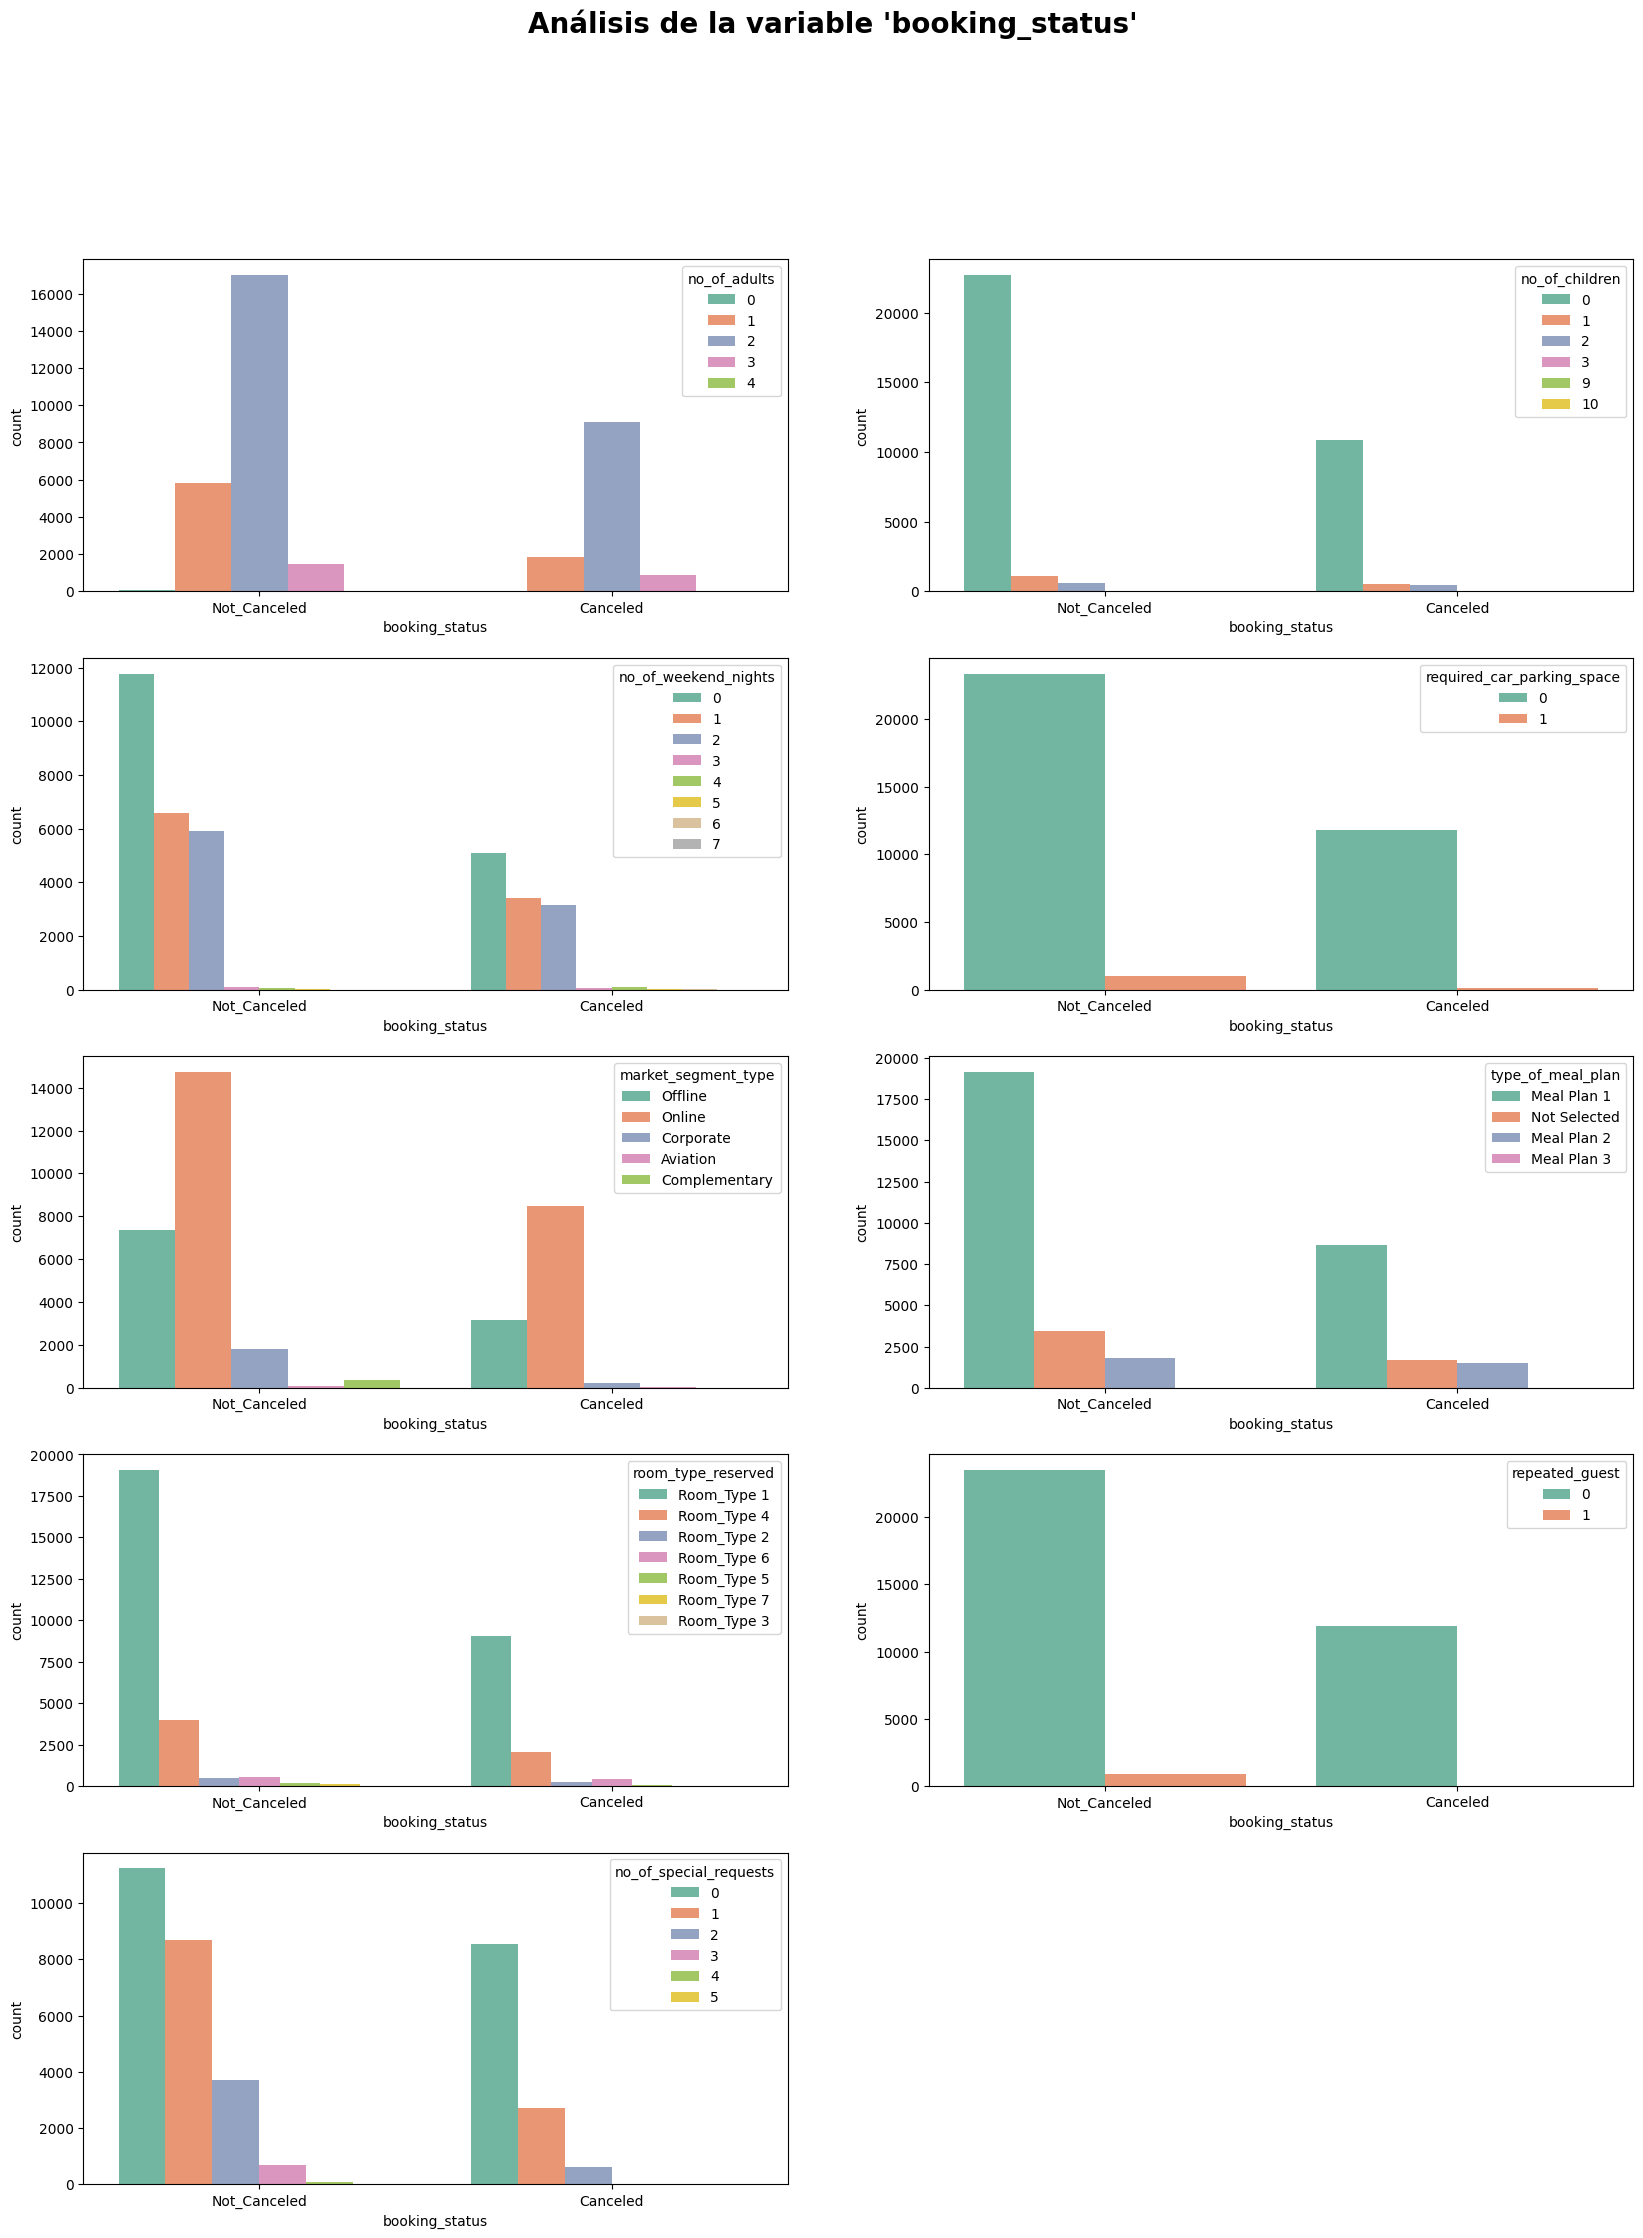

In [10]:
# Representación de las variables en relación a 'booking_status'
plt.figure(figsize = (20, 25))
plt.suptitle("Análisis de la variable 'booking_status'",fontweight="bold", fontsize=20)

plt.subplot(5,2,1)
sns.countplot(x = 'booking_status', hue = 'no_of_adults', palette = 'Set2', data = df)

plt.subplot(5,2,2)
sns.countplot(x = 'booking_status', hue = 'no_of_children', palette = 'Set2', data = df)

plt.subplot(5,2,3)
sns.countplot(x = 'booking_status', hue = 'no_of_weekend_nights', palette = 'Set2', data = df)

plt.subplot(5,2,4)
sns.countplot(x = 'booking_status', hue = 'required_car_parking_space', palette = 'Set2', data = df)

plt.subplot(5,2,5)
sns.countplot(x = 'booking_status', hue = 'market_segment_type', palette = 'Set2', data = df)

plt.subplot(5,2,6)
sns.countplot(x = 'booking_status', hue = 'type_of_meal_plan', palette = 'Set2', data = df)

plt.subplot(5,2,7)
sns.countplot(x = 'booking_status', hue = 'room_type_reserved', palette = 'Set2', data = df)

plt.subplot(5,2,8)
sns.countplot(x = 'booking_status', hue = 'repeated_guest', palette = 'Set2', data = df)

plt.subplot(5,2,9)
sns.countplot(x = 'booking_status', hue = 'no_of_special_requests', palette = 'Set2', data = df)

plt.show()

Se han representado las variables 'no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'required_car_parking_space', 'market_segment_type', 'type_of_meal_plan', 'room_type_reserved' y 'no_of_special_requests' en función de la variable 'booking_status' para ver el comportamiento de las variables y ver si se pueden sacar diferentes conclusiones.
- no_of_adults: La mayoría de la reservas suele ser de dos adultos y después de un adulto. Entre las reservas de dos adultos casi un tercio de reservas son canceladas. La probabilidad de que una reserva de tres adultos sea cancelada es alta, ya que la mitad de este tipo de reservas son canceladas.
- no_of_children: Los clientes que viajan con niños son más propensos a cancelar la reserva, aunque entre los que viajan sin niños casi un tercio de clientes cancela la reserva.
- no_of_weekend_nights: Los huéspedes que reservan algún día del fin de semana tienen más probabilidad de cancelar la reserva.
- required_car_parking_space: Un tercio de gente que no reserva aparcamiento suele cancelar la reserva, pero entre la gente que reserva el aparcamiento para el coche no suele cancelar la reserva.
- market_segment_type: Los huéspedes que más cancelan las reservas son los que están relacionados con el mercado online.
- type_of_meal_plan: Los huéspedes que contratan el 'Meal Plan 2' son los más propensos a cancelar la reserva, ya que hay casi la misma cantidad de huéspedes en los grupos de los que han cancelado o que no. Los que contratan otro tipo de 'Meal plan' cancelan alrededor de un tercio de personas la reserva.
- room_type_reserved: La mayoría de clientes que cancelan las reservas son los que se alojan en las habitaciones tipo 1 y 4. De los huéspedes que se alojan en este tipo de habitaciones un tercio suele cancelar la reserva. Por otro lado, en el caso de las habitaciones tipo 6 la diferencia entre reservas canceladas y no se iguala, porque hay casi la misma cantidad de clientes en los dos lados.
- repeated_guest: Los clientes que ya habían estado alguna vez en el mismo establecimiento, no suelen cancelar la reserva. Este es un indicio de que la primera vez que estuvieron en el hotel se quedaron satisfechos con el servicio.
- no_of_special_requests: Entre los clientes que no han hecho ninguna petición especial solo hay una diferencia de 1800 clientes entre los que no han cancelado la reserva y lo han cancelado, casi la misma cantidad de gente. Por otro lado, los huéspedes que han hecho alguna petición especial son más propensos a no cancelar la reserva, ya que la diferencia es muy grande entre estos huéspedes como se puede ver en el gráfico.


### 2.1.4. Análisis entre variables

Se han relacionado diferentes variables entre ellas en relación a la variable objetivo ('booking_status') porque se busca entender cómo estas variables se interrelacionan y cómo pueden influir en 'booking_status'. Al analizar las relaciones entre las variables, se han podido identificar patrones, dependencias y asociaciones que nos ayudan a comprender mejor el fenómeno que han estado estudiando. Para ello se ha creado varios gráficos para visualizar estas relaciones.

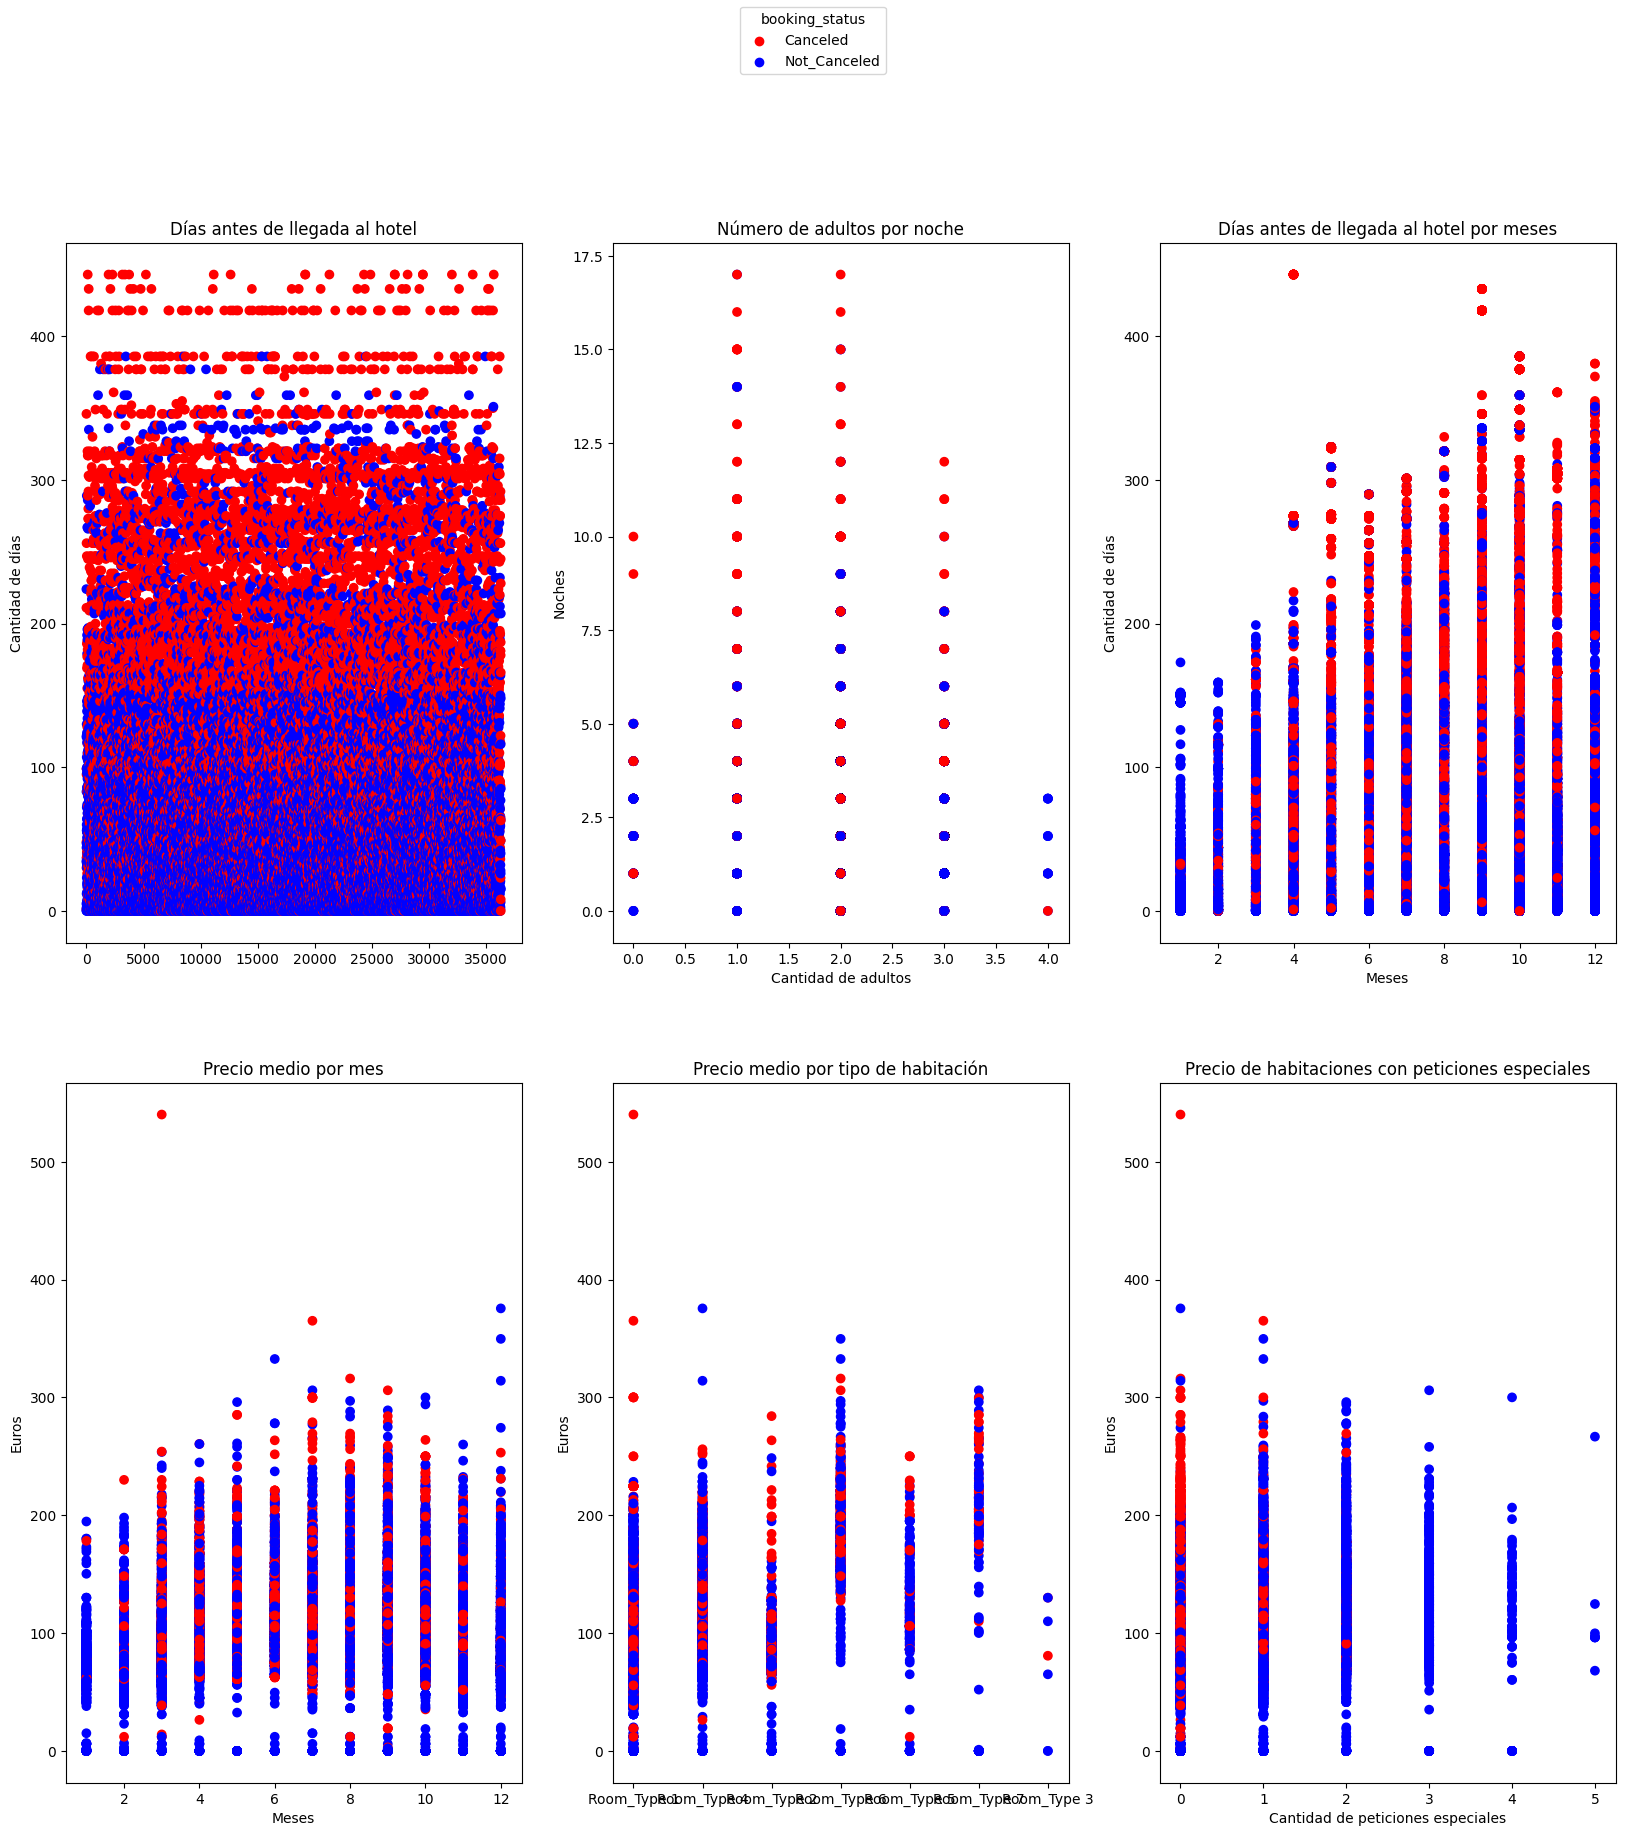

In [11]:
# Representación de las relaciones entre variables 
fig, ax = plt.subplots(2,3, figsize = (20, 20))

plot1 = ax[0][0].scatter(df['lead_time'].index, df['lead_time'], c=df['booking_status'].map({'Canceled': 'red', 'Not_Canceled':'blue'}))
ax[0][0].set_title('Días antes de llegada al hotel')
ax[0][0].set_ylabel('Cantidad de días')

plot2 = ax[0][1].scatter(df['no_of_adults'], df['no_of_week_nights'], c=df['booking_status'].map({'Canceled': 'red', 'Not_Canceled':'blue'}))
ax[0][1].set_title('Número de adultos por noche')
ax[0][1].set_xlabel('Cantidad de adultos')
ax[0][1].set_ylabel('Noches')

plot3 = ax[0][2].scatter(df['arrival_month'], df['lead_time'], c=df['booking_status'].map({'Canceled': 'red', 'Not_Canceled':'blue'}))
ax[0][2].set_title('Días antes de llegada al hotel por meses')
ax[0][2].set_xlabel('Meses')
ax[0][2].set_ylabel('Cantidad de días')

plot4 = ax[1][0].scatter(df['arrival_month'], df['avg_price_per_room'], c=df['booking_status'].map({'Canceled': 'red', 'Not_Canceled':'blue'}))
ax[1][0].set_title('Precio medio por mes')
ax[1][0].set_xlabel('Meses')
ax[1][0].set_ylabel('Euros')

plot5 = ax[1][1].scatter(df['room_type_reserved'], df['avg_price_per_room'], c=df['booking_status'].map({'Canceled': 'red', 'Not_Canceled':'blue'}))
ax[1][1].set_title('Precio medio por tipo de habitación')
ax[1][1].set_ylabel('Euros')

plot6 = ax[1][2].scatter(df['no_of_special_requests'], df['avg_price_per_room'], c=df['booking_status'].map({'Canceled': 'red', 'Not_Canceled':'blue'}))
ax[1][2].set_title('Precio de habitaciones con peticiones especiales')
ax[1][2].set_xlabel('Cantidad de peticiones especiales')
ax[1][2].set_ylabel('Euros')


leg = plt.figlegend((plot1, plot2, plot3, plot4, plot5), ['Canceled', 'Not_Canceled'], loc='upper center', ncol=1, title='booking_status')
leg.legend_handles[0].set_color('red')
leg.legend_handles[1].set_color('blue')
plt.show()

- Días antes de llegada al hotel: En la relación con la variable 'booking_status' las reservas que se han realizado con más días de antelación son más propensas a que se cancelen. En el gráfico se ve claramente que las reservas que se han hecho 200 días o más antes de la llegada al hotel la mayoría han sido canceladas. 
- Número de adultos por noche: Las reservas para estancias largas son muy propensas para que sean canceladas, además la mayoría de las reservas realizadas por uno o dos adultos son propensas a que sean canceladas. Por lo que, si la reserva es por ejemplo, para dos semanas (10 noches entre semana) y dos adultos tiene una probabilidad alta de que sea cancelada.
- Días antes de llegada al hotel por meses: A medida que va pasando el año las reservas se hacen con mucha más antelación. Como en el primer gráfico (Gráfico: 'Días antes de llegada al hotel'), se puede deducir que las reservas que se han hecho 200 días o más antes de la llegada al hotel la mayoría han sido canceladas. Este tipo de reservas empiezan a ser más habituales a partir de mayo hasta noviembre. 
- Precio medio por mes: Durante los meses (noviembre, diciembre, enero y febrero) de invierno los precios son más bajos, pero también hay menos cancelaciones que durante los demás meses. Por lo que, la subida de precio en temporada alta puede afectar a las cancelaciones.
- Precio medio por tipo de habitación: Se puede ver que el precio de las habitaciones apenas influye en las cancelaciones. Analizando los precios más bajos se ve que la mayoría de las reservas no son canceladas, pero a medida que el precio aumenta en algunos casos se ve que hay más cancelaciones, por ejemplo, las reservas de las habitaciones tipo 1, 2 y 5 más caras han sido canceladas.
- Precio de habitaciones con peticiones especiales: En este gráfico se ve claramente que la reserva cuantas más peticiones especiales tenga tiene menos probabilidad de que se cancele, ya que la mayoría de las reservas canceladas no tienen peticiones especiales o solo tiene una petición especial.

### 2.1.5. Conclusiones sobre las variables

Las variables categóricas revelaron que la mayoría de los huéspedes eligen el 'Meal Plan 1', las habitaciones más reservadas son del tipo 1 y 4, y la mayoría de las reservas provienen del mercado en línea. En cuanto a otras variables, se observó que la mayoría de los clientes no reservan noches de fin de semana, las reservas se realizan con pocos días de antelación y los meses con más llegadas al hotel son agosto, septiembre y octubre. El precio medio de las habitaciones es variable, pero la mayoría se encuentra por debajo de 100€, y la mayoría de los huéspedes no hacen peticiones especiales.

Al relacionar estas variables con el estado de reserva, se encontró que las reservas con tres adultos y las que incluyen niños tienen mayor probabilidad de cancelarse. Las reservas que incluyen noches de fin de semana también tienen más probabilidades de ser canceladas. Los huéspedes que no reservan estacionamiento y los del mercado en línea tienen una mayor tasa de cancelación. Aquellos que eligen el 'Meal Plan 2' son más propensos a cancelar, y las habitaciones tipo 1 y 4 tienen una mayor tasa de cancelación.

En general, estos resultados brindan información valiosa para la gestión hotelera y la toma de decisiones relacionadas con servicios y precios.

## 2.2. Preprocesamiento de los datos
Una vez hecho un primer análisis, se trata de "limpiar" el dataset y adaptarlo a nuestras necesidades (en este caso, predecir si se cancelará la reserva o no).

### 2.2.1. Creación de nuevas variables

In [12]:
# Creación de la variable 'no_of_guests' --> Cantidad de huéspedes en total
df['no_of_guests'] = df['no_of_adults'] + df['no_of_children']

# Creación de la variable 'no_of_nights' --> Cantidad de noches en total
df['no_of_nights'] = df['no_of_weekend_nights'] + df['no_of_week_nights']

# Creación de la fecha de llegada con todos los datos
def create_date_string(row):
    return f"{row['arrival_year']:04}{row['arrival_month']:02}{row['arrival_date']:02}"

dates = df[['arrival_year', 'arrival_month', 'arrival_date']]
df['date'] = dates.apply(create_date_string, axis=1)
df['date'] = df['date'].astype(int)

Se ha decidido crear dos variables nuevas que se llaman 'no_of_guests' y 'no_of_nights' para simplificar el conjunto de datos sin perder información, ya que las variables nuevas se crean en base a variables existentes. Como, 'no_of_guests' que representa el número de total de huéspedes y es creada con la suma de las variables 'no_of_adults' y 'no_of_children'. Por otro lado, 'no_of_nights' representa el número total de noches que se ha reservado el alojamiento. Esto se consigue con la suma de las variables 'no_of_weekend_nights' y 'no_of_week_nights'. Por otro lado, se han unificado las variables 'arrival_year', 'arrival_month' y 'arrival_date' para crear la nueva variable 'date. Esta variable 'date' es una variable númerica que determina la fecha de llegada del huésped. Esta variable numérica tiene toda la información que tiene las tres variables mencionadas y tiene el siguiente formato 'AñoMesDía', por ejemplo, el 2 de octubre de 2018 estaría compuesto de la siguiente manera, 20181002.

### 2.2.2. Ajuste y transformación de variables

In [13]:
# Ajustar y transformar la lista de valores categóricos
df['type_of_meal_plan'] = df['type_of_meal_plan'].map({"Meal Plan 1": 1, 'Not Selected': 0, 'Meal Plan 2': 2 ,'Meal Plan 3': 3})
df['room_type_reserved'] = df["room_type_reserved"].map({'Room_Type 1': 1, 'Room_Type 2': 2, 'Room_Type 3': 3,'Room_Type 4': 4,'Room_Type 5': 5,'Room_Type 6': 6,'Room_Type 7': 7})
df['market_segment_type'] = df['market_segment_type'].map({"Offline": 0, 'Online': 1, 'Corporate': 2 ,'Aviation': 3,'Complementary': 4})
df['booking_status'] = df['booking_status'].map({'Canceled': 0, 'Not_Canceled': 1})

df['type_of_meal_plan'] = df['type_of_meal_plan'].astype(int)
df['room_type_reserved']= df['room_type_reserved'].astype(int)
df['market_segment_type']= df['market_segment_type'].astype(int)
df['booking_status']= df['booking_status'].astype(int)

# Extraer 'booking_status'
col = df.pop('booking_status')

# Añadir la 'booking_status' al final del DataFrame
df.insert(len(df.columns), 'booking_status', col)

hotels = df.drop(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights',\
                  'arrival_year', 'arrival_month', 'arrival_date'], axis=1)
hotels.head()

,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,no_of_guests,no_of_nights,date,booking_status
0,1,0,1,224,0,0,0,0,65.00,0,2,3,20171002,1
1,0,0,1,5,1,0,0,0,106.68,1,2,5,20181106,1
2,1,0,1,1,1,0,0,0,60.00,0,1,3,20180228,0
3,1,0,1,211,1,0,0,0,100.00,0,2,2,20180520,0
4,0,0,1,48,1,0,0,0,94.50,0,2,2,20180411,0


Las variables categóricas 'type_of_meal_plan', 'room_type_reserved' y 'market_segment_type', se han convertido a variables númericas mediante mapeos. Los mapeos intercambian los valores categóricos por valores determinados, después se convierte ese valor a númerico, ya que el formato es compatible. Por ejemplo, 'market_segment_type' tiene los siguientes valores categóricos: 'Offline', 'Online', 'Aviation', 'Corporate' y 'Complementary'. Estos se han convertido en los valores 0, 1, 2, 3 y 4, respectivamente. Otro ejemplo claro es la variable 'booking_status', cuando uno (1) es valor 'Not_Canceled' y cero (0) es 'Canceled'.

Por otro lado, se han eliminado las variables innecesarias para el análisis de datos, ya que son variables que no aportan información. Como, la variable 'Booking_ID' que son 36275 identificadores diferentes, por lo que no se puede encontrar ningún patron diferencial. También, se han eliminado las variables 'no_of_adults', 'no_of_children', 'no_of_nights'no_of_weekend_nights' y 'no_of_week_nights' por la creación de las variables mencionadas en el párrafo anterior que ya dan la información que dan estas variables. Por último, se han eliminado 'arrival_year', 'arrival_month' y 'arrival_date', porque se ha creado una nueva variable 'date' que engloba los datos de estas tres variables.

### 2.2.3. Correlación de las variables

<Axes: >

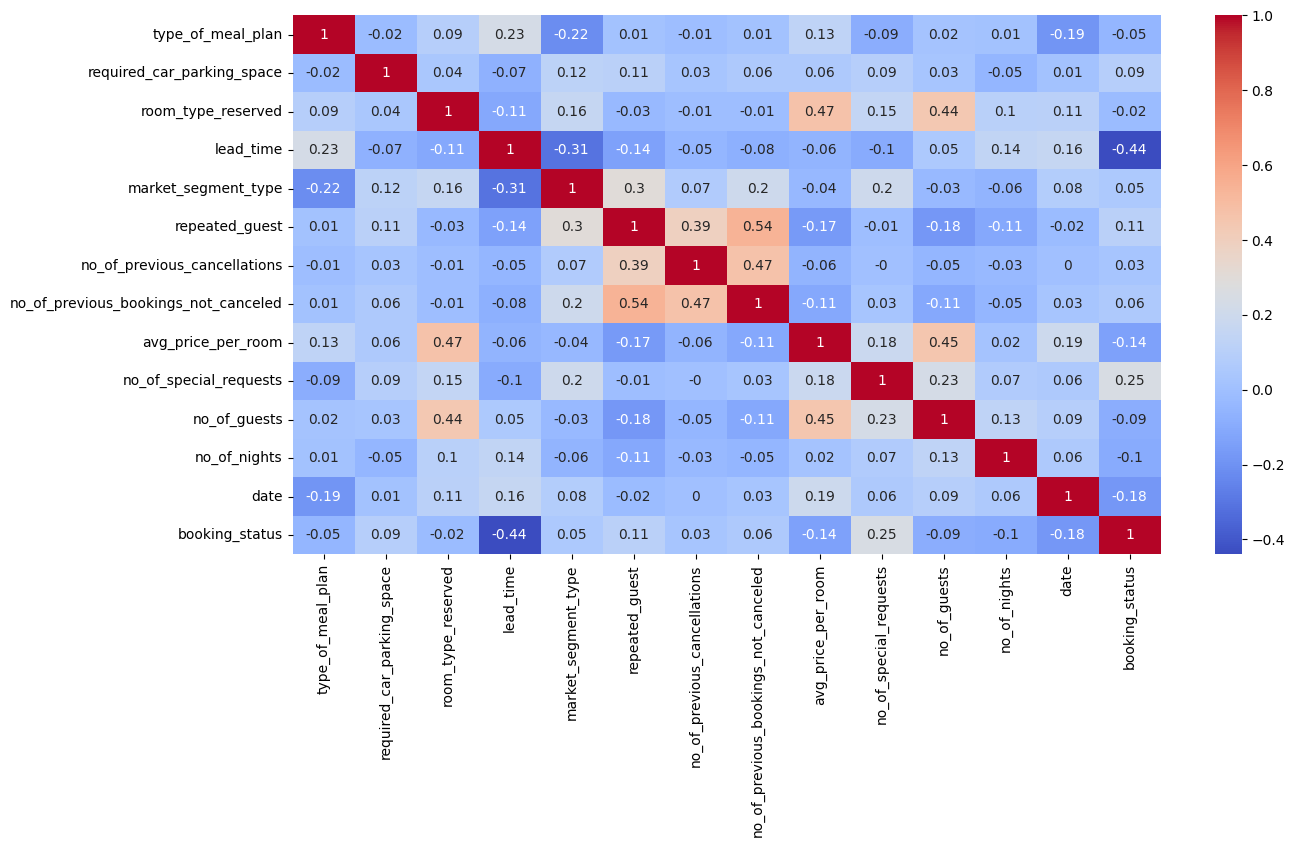

In [14]:
plt.figure(figsize = (14,7))

sns.heatmap(hotels.corr().round(2), annot = True, cmap = 'coolwarm')

Los valores de correlación varían entre -1 y 1, donde -1 indica una correlación negativa perfecta, 0 indica una correlación nula, y 1 indica una correlación positiva perfecta.

En general, los valores de correlación más fuertes son aquellos que están más cerca de -1 o 1. Una correlación negativa perfecta (valor -1) indica una relación lineal inversa perfecta, lo que significa que cuando una variable aumenta, la otra disminuye en una forma predecible. Por otro lado, una correlación positiva perfecta (valor 1) indica una relación lineal directa perfecta, lo que significa que cuando una variable aumenta, la otra también aumenta en una forma predecible.

Sin embargo, es importante tener en cuenta que la interpretación de la fuerza de la correlación puede depender del contexto del problema y del dominio de los datos en estudio. En algunos casos, una correlación moderada (por ejemplo, entre 0.3 y 0.7) puede considerarse fuerte, como es en este caso. Viendo el mapa de calor se ha examinado las correlaciones más fuertes entre diferentes variables:
- no_of_previous_cancellations - repeated_guest: 0.39
    - Cuanto más alto es el número de cancelaciones previas hay más probabilidad de que el huésped haya repetido anteriormente.
- no_of_previous_bookings_not_canceled - repeated_guest: 0.54
    - Estas dos variables tienen todavía correlación más fuerte que el anterior, es el valor de correlación más alto del mapa de calor. Cuanto más alto sea el número de reservas previas no canceladas, ese huésped tendrá más probabilidad de haber repetido, es decir, los clientes que más reservas acuden son más propensos a repetir la reserva.
- no_of_previous_bookings_not_canceled - no_of_previous_cancellations: 0.47
    - Dos variables que se han analizado anteriormente, también tienen una correlación alta. Cuantas más reservas no haya cancelado anteriormente más reservas habrá cancelado el cliente, es decir, los huéspedes que más reservas hacen son más propensos a tener cancelaciones previas.
- avg_price_per_room - room_type_reserved: 0.47
    - Es lógico que estas dos variables esten correlacionadas, ya que el precio de la habitación variará según el tipo de habitación. Por ejemplo, las habitaciones más caras son
- avg_price_per_room - no_of_guests: 0.45
    - También, es lógico que estas dos variables tengan una correlación fuerte. Cuanto mayor es el precio de la habitación, el número de huéspedes es más alto. Normalmente, las habitaciones más grandes son más caros, es decir, una habitación triple es más cara que una habitación individual, asimismo la reserva para tres huéspedes normalmente será más caro que para un huésped.
- room_type_reserved - no_of_guests: 0.44
    - Esta correlación va relacionada con las dos anteriores. En este caso, hay una correlación fuerte entre estas dos variables, ya que el tipo de habitación depende del número de huéspedes que se van alojar en ella. Entonces, cuanto más grande sea la habitación más huéspedes entrarán en ella. 

Por otro lado, estas son las variables que tiene correlación más fuerte con 'booking_status'. 
booking_status - lead_time: -0.44
    - 'lead_time' tiene una correlación negativa fuerte con la variable respuesta. Como se ha explicado anteriormente una correlación negativa indica una relación lineal inversa perfecta. En este caso, si la reserva se hace a pocos días de la llegada es probable que esta no se cancele. Por el contrario, si la se reserva se hace con mucho tiempo de antelación es más probable que esta se cancele.
booking_status - no_of_special_requests: 0.25
    - Esta es la segunda correlación más fuerte que tiene 'booking_status' con las demás variables. En este caso, cuantas más peticiones especiales se hagan es más probable de que la reserva no se cancele.

Al ver este mapa de calor se pensaba que otra variables podrían tener una correlación fuerte, sin embargo muchas de estas variables tienen correlaciones debiles. 
- no_of_previous_cancellations - booking_status: 0.06
    - El número de reservas anteriores canceladas por el cliente antes de la reserva actual no influye en el estado de las reservas. Por lo que, una persona que haya cancelado reservas no influye en la reserva actual, por lo que estas cancelaciones podrían ser por otras razones.
- repeated_guest - booking_status: 0.11
    - En este caso, un cliente que ya ha repetido no asegura que esta vez acuda a la reserva. Por lo que, el haber estado anteriormente alojado en el hotel, no tiene nada que ver con las reservas actuales.

### 2.2.4. Reducción de dimensionalidad

La eliminación de variables con correlación débil es un paso importante en el proceso de modelado de datos, ya que nos permite simplificar el modelo y eliminar el ruido innecesario. Al eliminar estas variables, se ha enfocado en aquellas que realmente tienen una influencia significativa en la variable objetivo, lo que nos ayuda a mejorar la precisión y la interpretación de nuestro modelo.

Existen diferentes enfoques para identificar y eliminar variables con correlación débil. Uno de ellos es utilizar técnicas estadísticas, como el coeficiente de correlación o las pruebas de hipótesis, para evaluar la fuerza de la relación entre cada variable y la variable objetivo. Aquellas variables que presenten una correlación cercana a cero o un valor de p alto se considerarán como variables con correlación débil y se pueden eliminar del modelo.

In [15]:
# REDUCCIÓN DE DIMENSIONALIDAD / Variables con valor de correlación entre -0.1 y 0.1 se van a borrar 
hotels_cleaned = hotels.drop(['type_of_meal_plan', 'room_type_reserved', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled'], axis=1)

# Ordenar las reservas por fecha
hotels_cleaned.sort_values('date', inplace=True)
hotels_cleaned.head()

,required_car_parking_space,lead_time,market_segment_type,repeated_guest,avg_price_per_room,no_of_special_requests,no_of_guests,no_of_nights,date,booking_status
3871,0,257,1,0,101.5,0,2,2,20170701,0
26642,0,257,0,0,101.5,0,2,2,20170701,0
16946,0,257,0,0,101.5,0,2,2,20170701,0
3898,0,257,1,0,101.5,0,2,2,20170701,0
5884,0,257,0,0,80.0,0,1,2,20170701,1


Las variables con una correlación cercana a cero generalmente tienen poca influencia en la relación entre las variables y pueden no proporcionar información significativa para el análisis o la construcción del modelo. Sin embargo, es importante tener en cuenta el contexto y la naturaleza del problema en particular antes de eliminar variables, ya que podría existir información relevante que no se refleje en la correlación. Además, es recomendable utilizar técnicas de selección de características más avanzadas que consideren otros factores, como la importancia predictiva y la contribución al rendimiento del modelo.

## 2.3. Conclusiones del análisis de datos

El análisis de los datos reveló interesantes relaciones que influyen en la experiencia del huésped en el hotel. En primer lugar, se encontró que el historial de cancelaciones y reservas anteriores juega un papel crucial en la condición de 'repeated_guest'. Aquellos que han tenido un alto número de cancelaciones previas tienen menos probabilidades de repetir, mientras que aquellos con un historial de reservas no canceladas son más propensos a volver.

Otra relación importante se observa entre el tipo de habitación y el número de huéspedes. Es evidente que las habitaciones más grandes tienden a acomodar a más huéspedes. Esto es lógico, ya que las preferencias de los huéspedes y la disponibilidad de espacio están estrechamente vinculadas. Los huéspedes suelen optar por habitaciones más grandes cuando viajan en grupos o con familias, lo que resulta en una mayor ocupación.

El precio promedio por habitación también está relacionado tanto con el tipo de habitación como con el número de huéspedes. Habitaciones más grandes y con mayor capacidad suelen tener un precio más alto. Esta relación es comprensible, ya que las habitaciones más espaciosas y lujosas ofrecen más comodidad y, por lo tanto, suelen tener un costo mayor.

El tiempo de antelación en la realización de una reserva también desempeña un papel importante en el estado de la misma. Se observó que las reservas realizadas con mayor antelación tienen una mayor probabilidad de ser canceladas. Esto podría atribuirse a cambios en los planes de los huéspedes, imprevistos o simplemente una mayor incertidumbre en el futuro.

Por último, las solicitudes especiales realizadas por los huéspedes también influyen en el estado de la reserva. Aquellos que presentan un mayor número de solicitudes especiales tienen una menor probabilidad de cancelación. Esto indica que los huéspedes que tienen necesidades o preferencias específicas están más comprometidos con su reserva y tienen menos probabilidades de cancelarla.

# **3. Entrenamiento de un modelo**
Ahora que el dataset está limpio y se ha hecho un análisis de las diferentes variables, se puede proceder a entrenar un modelo para predecir si se cancela la reserva o no.

Se probarán con 3 modelos diferentes (DecisionTreeClassifier, RandomForestClassifier y LogisticRegression) e se interpretará los resultados.

Para empezar, se separan los datos en las variables independientes o características (features) y la variable dependiente o 'booking_status' (target) que se quiere predecir.

Después, se utiliza para dividir los datos en conjuntos de entrenamiento y prueba, lo que permite evaluar la capacidad de generalización del modelo.

In [16]:
features = hotels_cleaned.loc[:, hotels_cleaned.columns != 'booking_status']
target = hotels_cleaned['booking_status']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=24)

Precisión de modelo train: 0.8330806340454858
Matriz de confusion de train:
[[ 6787  2748]
 [ 2096 17389]]
Precisión de modelo test: 0.8237077877325982
Matriz de confusion:
[[1634  716]
 [ 563 4342]]


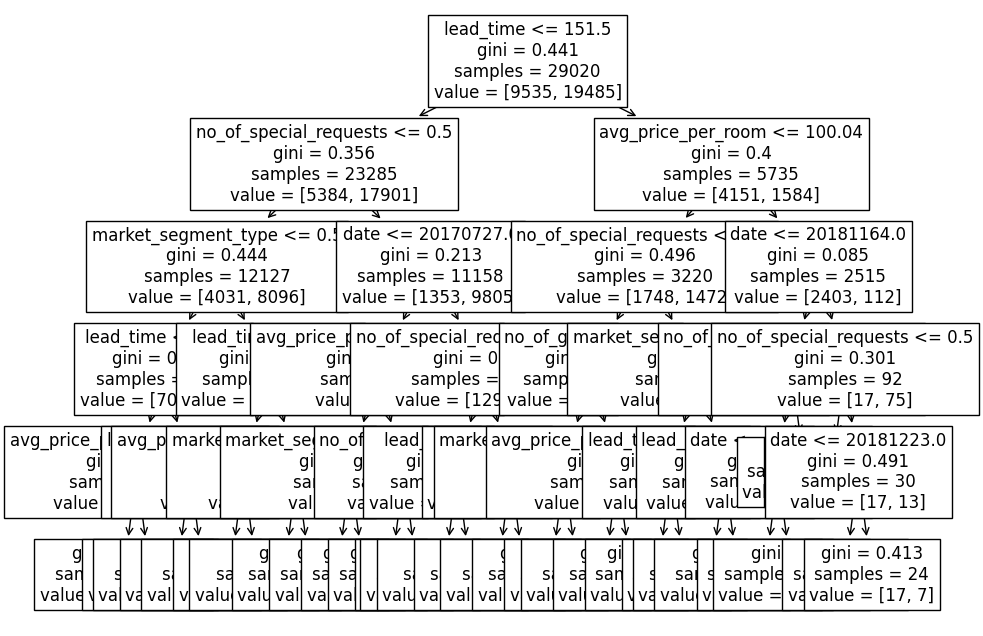

In [17]:
# Hacer una instancia del modelo DecisionTreeClassifier
train_tree = DecisionTreeClassifier(max_depth = 5, random_state = 24).fit(X_train, y_train)

# Representación del árbol de decisión
plt.figure(figsize=(10, 8))
plot_tree(train_tree, feature_names=list(features.columns), fontsize=12)

# Calculando precisión y matriz de confusión del modelo de train
y_train_pred = train_tree.predict(X_train)
tree_train_accuracy = accuracy_score(y_train, y_train_pred)
print("Precisión de modelo train: {}".format(tree_train_accuracy))
print("Matriz de confusion de train:\n{}".format(confusion_matrix(y_train, y_train_pred)))

# Calculando precisión y matriz de confusión del modelo de test
y_test_pred = train_tree.predict(X_test)
tree_test_accuracy = accuracy_score(y_test, y_test_pred)
print("Precisión de modelo test: {}".format(tree_test_accuracy))
print("Matriz de confusion:\n{}".format(confusion_matrix(y_test, y_test_pred)))

En este paso se evalúa el rendimiento del modelo utilizando diferentes métricas de evaluación, como la precisión y la matriz de confusión, tanto en el conjunto de entrenamiento como en el de prueba. Los resultados indican que el modelo tiene una precisión aceptable tanto en el conjunto de entrenamiento como en el de prueba, con valores de 0.829 y 0.833, respectivamente. Además, la matriz de confusión del conjunto de entrenamiento indica que el modelo clasifica correctamente la mayoría de los casos negativos (6591 verdaderos negativos) pero tiene más dificultades para identificar los casos positivos (2072 falsos negativos). La matriz de confusión del conjunto de prueba indica que el modelo tiene un desempeño similar en ambos tipos de casos, con 1632 verdaderos negativos y 4410 verdaderos positivos. En general, estos resultados sugieren que el modelo es capaz de clasificar con precisión la mayoría de los casos en ambos conjuntos de datos, aunque podría haber cierto sesgo en la predicción de casos positivos en el conjunto de entrenamiento.

In [18]:
# Grid de hiperparámetros evaluados
param_grid = {'max_depth': [4, 5, 7, 8, 10, 11]}

# Búsqueda por grid search con validación cruzada
grid = GridSearchCV(
        estimator  = RandomForestClassifier(random_state=24),
        param_grid = param_grid
       )

grid.fit(X_train, y_train)

print("El mejor conjunto de parámetros encontrado en el conjunto de desarrollo: {}".format(grid.best_params_))

# Hacer una instancia del modelo RandomForestClassifier
train_rfc = RandomForestClassifier(random_state = 24).fit(X_train, y_train)

# Calculando precisión y matriz de confusión del modelo de test
y_test_pred = train_rfc.predict(X_test)
rfc_test_accuracy = accuracy_score(y_test, y_test_pred)
print("Precisión de modelo test: {}".format(rfc_test_accuracy))
print("Matriz de confusion:\n{}".format(confusion_matrix(y_test, y_test_pred)))

El mejor conjunto de parámetros encontrado en el conjunto de desarrollo: {'max_depth': 11}
Precisión de modelo test: 0.8949689869055824
Matriz de confusion:
[[1888  462]
 [ 300 4605]]


El código realiza una búsqueda de los mejores parámetros para un modelo RandomForestClassifier utilizando GridSearchCV y validación cruzada. GridSearchCV realiza una búsqueda exhaustiva de los mejores parámetros del modelo en una cuadrícula de posibles valores. Luego, se ajusta el modelo con los mejores parámetros encontrados y se hace una predicción en el conjunto de prueba.

Se puede decir que se ha obtenido una buena precisión en el conjunto de test, ya que la precisión del modelo es de 0.895, lo cual indica que el modelo clasifica correctamente el 89'5% de las instancias en el conjunto de test. Además, la matriz de confusión muestra que el modelo ha logrado predecir correctamente la mayoría de las instancias, con un bajo número de falsos positivos y falsos negativos. El mejor conjunto de parámetros encontrado por el modelo durante el entrenamiento es {'max_depth': 11}, lo que sugiere que el modelo ha logrado ajustarse adecuadamente a los datos de entrenamiento sin sobreajustar. En general, estos resultados indican que el modelo es adecuado para su uso en la clasificación de datos similares.

In [19]:
# Definir las etapas del modelo
model = Pipeline([
    ('scale', StandardScaler()),
    ('lin_reg', LogisticRegression(solver='lbfgs'))
])

model.fit(X_train, y_train)

# Calculando precisión y matriz de confusión del modelo de test
y_test_pred = model.predict(X_test)
lr_test_accuracy = accuracy_score(y_test, y_test_pred)
print("Precisión de modelo test: {}".format(lr_test_accuracy))
print("Matriz de confusion:\n{}".format(confusion_matrix(y_test, y_test_pred)))

Precisión de modelo test: 0.7937973811164714
Matriz de confusion:
[[1368  982]
 [ 514 4391]]


La precisión de modelo test indica que este modelo ha logrado una precisión del 80'26% al predecir los resultados de un conjunto de datos de prueba. La matriz de confusión muestra el número de predicciones correctas e incorrectas realizadas por el modelo en el conjunto de datos de prueba. En la diagonal principal, se muestran las predicciones correctas: 1424 observaciones fueron clasificadas correctamente como negativas (la clase 0) y 4399 observaciones fueron clasificadas correctamente como positivas (la clase 1). En la diagonal secundaria, se muestran las predicciones incorrectas: 506 observaciones de la clase 0 fueron clasificadas como pertenecientes a la clase 1 (falsos positivos), mientras que 926 observaciones de la clase 1 fueron clasificadas como pertenecientes a la clase 0 (falsos negativos).

In [20]:
# Definir un procedimiento de validación cruzada determinista
cv = KFold(n_splits=5, shuffle=True, random_state=24)

# Calcular los valores MSE
scorer = make_scorer(roc_auc_score)
scores = cross_val_score(model, features, target, scoring=scorer, cv=cv)
scores_train_tree = cross_val_score(train_tree, features, target, scoring=scorer, cv=cv)
scores_train_rfc = cross_val_score(train_rfc, features, target, scoring=scorer, cv=cv)

# Mostrar la puntuación media y su desviación estándar
print(f'ROC AUC: {scores.mean():.3f} (± {scores.std():.3f})')
print(f'ROC AUC train_tree: {scores_train_tree.mean():.3f} (± {scores_train_tree.std():.3f})')
print(f'ROC AUC train_rfc: {scores_train_rfc.mean():.3f} (± {scores_train_rfc.std():.3f})')

ROC AUC: 0.736 (± 0.007)
ROC AUC train_tree: 0.791 (± 0.003)
ROC AUC train_rfc: 0.875 (± 0.003)


En este paso se evalúa el rendimiento del modelo utilizando la métrica de puntuación ROC AUC y se utiliza la validación cruzada para evaluar el rendimiento del modelo en diferentes subconjuntos de datos. Se calcula la puntuación ROC AUC en la validación cruzada de un modelo de aprendizaje automático. La puntuación ROC AUC mide la capacidad del modelo para distinguir entre clases positivas y negativas en un problema de clasificación binaria.

Un buen resultado sería una puntuación ROC AUC cercana a 1, lo que indica que el modelo tiene una alta capacidad para distinguir entre las clases positivas y negativas en un problema de clasificación binaria. Sin embargo, el nivel de "bueno" dependerá del contexto del problema y de las expectativas del usuario. En este caso, el resultado de 0'736 podría considerarse aceptable, pero podría mejorarse. Un ROC AUC de 0'791 indica que el modelo basado en árboles de decisión es ligeramente mejor que el modelo de regresión logística. Por último, el resultado de 0'851 indica que el modelo de *RandomForestClassifier* tiene un rendimiento considerablemente mejor que los otros modelos evaluados.


### 3.1. Conclusiones de los modelos desarrollados

En el modelo *DecisionTreeClassifier*, se destaca que el modelo tiene una precisión aceptable tanto en el conjunto de entrenamiento como en el de prueba, aunque se observa una dificultad en la identificación de casos positivos. Esto sugiere que el modelo podría beneficiarse de mejoras en su capacidad para clasificar correctamente los casos positivos.

En el segundo modelo *RandomForestClassifier*, se muestra que el modelo ha obtenido una buena precisión (89'5%) en el conjunto de prueba, indicando que clasifica correctamente la mayoría de las instancias. Además, la matriz de confusión revela un bajo número de falsos positivos y falsos negativos, lo que sugiere un rendimiento efectivo del modelo en la clasificación de los datos.

Por otro lado, el tercer modelo *LogisticRegression* destaca que el modelo logra una precisión del 80'26% en la predicción de un conjunto de datos de prueba. Sin embargo, la matriz de confusión muestra la presencia de algunos falsos positivos y falsos negativos, lo que indica que el modelo comete errores en la clasificación de ciertos casos.

En resumen, los resultados sugieren que los modelos tienen un rendimiento generalmente aceptable en la clasificación de los datos, aunque existe margen para mejorar la identificación de casos positivos y reducir los errores de clasificación. En función de estos resultados, el *RandomForestClassifier* parece ser el modelo con el rendimiento más alto, con una precisión de 0'895 en el conjunto de prueba y una matriz de confusión que muestra un bajo número de errores de clasificación. También, tiene un área bajo la curva ROC más alta. Por lo tanto, considerando ambas métricas, el modelo de *RandomForestClassifier* es el mejor en esta evaluación. Entonces, viendo los resultados el modelo que se va a utilizar para hacer las predicciones será el modelo de *RandomForestClassifier*, ya que ha obtenido los mejores resultados comparando con los demás.

### 3.2. Importancia de las variables del modelo

En este paso se obtiene la importancia de las diferentes características del modelo, lo que permite identificar las características más importantes para la predicción del objetivo. En este análisis se presenta la importancia de las características (features) en un modelo de clasificación que se ha elegido (RandomForestClassifier).

In [21]:
# Se obtiene la importancia de las diferentes características del modelo
feature_importance = pd.DataFrame({'feature': list(features.columns), 'importance': list(train_rfc.feature_importances_)})
feature_importance.sort_values('importance', ascending=False)

,feature,importance
1,lead_time,0.347151
8,date,0.200272
4,avg_price_per_room,0.192121
5,no_of_special_requests,0.095028
7,no_of_nights,0.063422
2,market_segment_type,0.061141
6,no_of_guests,0.031970
0,required_car_parking_space,0.006433
3,repeated_guest,0.002462


La columna "feature" muestra el nombre de las variables en el conjunto de datos y la columna "importance" muestra el porcentaje de importancia de cada característica en el modelo.
Según los resultados, la característica más importante para el modelo es 'lead_time' con un valor de importancia del 38'4%. Esto sugiere que el tiempo de espera entre la reserva y la llegada es un factor crítico en la predicción del modelo. Las siguientes características más importantes son 'date', 'avg_price_per_room' y 'no_of_special_requests', lo que sugiere que la fecha de llegada, el precio promedio de la habitación y el número de solicitudes especiales también son factores importantes. La característica "repeated_guest" es la menos importante en el modelo con una importancia del 0'25%. Las cuatro variables más importantes ('lead_time', 'date', 'avg_price_per_room' y 'no_of_special_requests') acumulan un 83'5% de importancia en la predicción, por lo que los valores que puedan tener estas variables son determinantes a la hora de predecir el resultado de la reserva.

### 3.3. Predicción de nuevos casos
El modelo predictivo que se ha desarrollado anteriormente se utilizará para predecir en diferentes casos que tipos de reserva se cancelarán o no. En este caso, se han planteado estos tres casos diferentes para ver en que funcionamiento tiene el modelo desarrollado:

1. En el primer caso, se puede inferir que alguien hizo una reserva de hotel para dos huéspedes que se quedarán en la habitación durante cuatro noches. La reserva se realizó con dos meses de antelación (60 días), y la habitación tiene un precio promedio de 85€. También, se puede ver que el cliente hizo una solicitud especial (una solicitud adicional aparte de la reserva de habitación), y que no se requiere un espacio de estacionamiento para el coche. Además, el cliente no ha repetido en este establecimiento y el tipo de mercado está dirigido al sector 'Aviation'. La fecha de la reserva es el 21 de agosto de 2018. 

2. En el segundo caso, alguien hizo una reserva de hotel para un huésped que se quedará en la habitación durante dos noches. La reserva se realizó con un poco menos de un mes de antelación (28 días), y la habitación tiene un precio de 42'5€. También, se puede ver que el cliente no hizo solicitudes especiales y no se requiere un espacio de estacionamiento para el coche. Además, el huésped no ha estado anteriormente en este hotel y el tipo de mercado segmento es 'Complementary'. La reserva es para el 12 de abril de 2018.

3. En el tercer caso, un cliente hizo una reserva de hotel para dos huéspedes que se quedarán en la habitación durante tres noches. La reserva se realizó con siete meses y medio de antelación (220 días), y la habitación tiene un precio promedio de 101€. También, se puede ver que el cliente no hizo solicitudes especiales y se requiere un espacio de estacionamiento para el coche. Además, el cliente no es un huésped repetido y el tipo de mercado segmento es 'Corporate'. La reserva es para el día 3 de junio de 2017.

4. En el último, la reserva incluye un requerimiento de estacionamiento, se realizó con 153 días de anticipación a la fecha de llegada y el precio promedio por habitación es de 137'6€. No se realizaron solicitudes especiales y la reserva es para 3 huéspedes durante 1 noche. La reserva fue realizada el 28 de septiembre de 2017.

In [22]:
# Creación de los casos
caso_1 = pd.DataFrame([[0, 60, 0, 0, 85, 1, 2, 4, 20180821]], columns=list(features.columns))
caso_2 = pd.DataFrame([[0, 28, 1, 1, 42.5, 2, 1, 8, 20180412]], columns=list(features.columns))
caso_3 = pd.DataFrame([[1, 220, 2, 0, 101, 0, 2, 3, 20170603]], columns=list(features.columns))
caso_4 = pd.DataFrame([[1, 153, 4, 1, 137.6, 0, 3, 12, 20170928]], columns=list(features.columns))

# Predicción de los casos con el modelo seleccionado
resultado_1 = train_rfc.predict(caso_1)
resultado_2 = train_rfc.predict(caso_2)
resultado_3 = train_rfc.predict(caso_3)
resultado_4 = train_rfc.predict(caso_4)

list_resultado = [resultado_1, resultado_2, resultado_3, resultado_4]

# Visualización de los resultados de las predicciones para cada caso
for n_caso in range(0, len(list_resultado)):
    if(list_resultado[n_caso]):
        print("En el caso {} no se ha cancelado la reserva".format(n_caso+1))
    else:
        print("En el caso {} se ha cancelado la reserva".format(n_caso+1))

En el caso 1 no se ha cancelado la reserva
En el caso 2 no se ha cancelado la reserva
En el caso 3 se ha cancelado la reserva
En el caso 4 se ha cancelado la reserva


Viendo los resultados y el análisis de datos que se ha hecho en el proyecto se han sacado varias conclusiones sobre las variables. También, se han visto patrones en las variables por los que una reserva puede ser cancelada o no. Haciendo un repaso a las variables estas son las conclusiones que se han sacado:
- required_car_parking_space: Si el cliente ha pedido incluir en la reserva una plaza de parking hay poca probabilidad de que la reserva sea cancelada.
- lead_time: Cuanto mayor es el tiempo de llegada al hotel, mayor es la probabilidad de cancelación. Es decir, las reservas que se hacen con mucho tiempo de antelación tiene mayor probabilidad de que sean canceladas.
- market_segment_type: Las reservas que están enfocadas al mercado online tiene mayor probabilidad de cancelación.
- repeated_guest: Si el huésped no ha estado anteriormente alojado en el hotel tiene menor probabilidad de que la reserva de cancele.
- avg_price_per_room: En cuanto al precio medio de las habitaciones, cuanto más alto es el valor del alojamiento mayor es la probabilidad de cancelación. Las habitaciones con valor superior a 100€ tienen mayor porcentaje de cancelación que una habitación con valor inferior. Además, las reservas con habitaciones más baratas (<60€) tienen una tasa muy alta de que asistan los clientes.
- no_of_special_requests: Cuanto mayor es el número peticiones especiales en una reserva menor es la probabilidad de cancelación.
- no_of_guests:	La reserva para uno o dos huéspedes tiene mayor probabilidad de cancelación que una reserva para más de tres personas.
- no_of_nights: Cuanto mayor es la estancia en hotel, la probabilidad de cancelación es más grande. Si la reserva es de más de una semana tiene un porcentaje alto de cancelación.
- date: En meses de temporada alta veraniega la probabilidad de cancelación es más alta que el resto del año. En navidades, enero y febrero son los meses con menor porcentaje de cancelación.

Teniendo en cuenta está información de las variables y que las variables que más peso tienen en la predicción son 'lead_time', 'date', 'avg_price_per_room' y 'no_of_special_requests' respectivamente. 
Estas cuatro variables son determinantes a la hora de decidir el resultado de la predicción, ya que estas cuatro variables son las que más peso tienen en el modelo, lo que hace que las demás variables no tengan tanta repercusión en la predicción. Se ve claramente, en los casos que se han propuesto:
- Caso 1: La reserva con dos meses de antelación y los 85€ la noche con una petición especial hacen que la probabilidad de que el cliente acuda a la reserva sea alta. Aunque, la reserva haya sido en temporada alta.
- Caso 2: La reserva con un mes de antelación con dos peticiones especiales, los 42'5€ de la habitación y la reserva sea para abril hacen que la probabilidad de que el cliente acuda a la reserva sea muy alta, ya que tiene mejores condiciones que el caso anterior.
- Caso 3: Un cliente que ha reservado el alojamiento por 101€ con siete meses de antelación sin peticiones especiales y en junio tiene un porcentaje alto de que se cancele.
- Caso 4: Una reserva de 137'6€ para septiembre que se ha hecho siete meses antes sin peticiones especiales, también tiene una probabilidad muy alta de que se cancele.

Por lo que, son lógicas las predicciones obtenidas por el modelo. Esto quiere decir que el modelo que se ha desarrollado ha dado un buen rendimiento y el análisis que se ha hecho sobre el conjunto de datos tienen buena precisión, ya que se han cumplido todas las conclusiones que se han sacado en el análisis de datos.

# **4. Concept drift**

A medida que las preferencias de los clientes y las tendencias de viaje evolucionan, los modelos de predicción que utilizan los hoteles para pronosticar la demanda de habitaciones pueden volverse inexactos y generar errores en las predicciones. Estos cambios pueden tener un impacto significativo en la capacidad del hotel para optimizar su capacidad y maximizar sus ingresos, por lo que es importante monitorear y detectar cualquier signo de *concept drift* y ajustar los modelos de predicción en consecuencia.

En este apartado, se ha provocado *concept drift* en el conjunto de datos de diferentes maneras para ver como afecta en el modelo predictivo. Se han utilizado diferentes métodos para generar *concept drift* artificialmente, drift basado en la distribución del tiempo (Time distribution-based drift) y drift basado en las variables (Feature drift). Después de generar *concept drift*, se ha detectado mediante diferentes métodos de detección de drift, uno de ellos ha sido usando las funciones de la libreria river.

Para ver como ha afectado el *concept drift* en el conjunto de datos, se ha representado la variable afectada en un gráfico. En estos gráficos se ha visto claramente las consecuencias de la generación de este efecto. También, se ha visto diferentes tipos de *concept drift* que hay, ya que los diferentes métodos de generación tienen crean un tipo diferente de *concept drift*. 

Es importante tener en cuenta que la introducción del *concept drift* en un conjunto de datos real puede ser un reto, ya que requiere una cuidadosa consideración de los factores específicos del dominio que pueden afectar a la distribución subyacente de los datos. Además, es esencial evaluar la eficacia de los métodos de detección y adaptación del *concept drift* utilizados para asegurarse de que funcionan correctamente.

## 4.1. Diferentes tipos de detectores

La función 'detect_drift_ADWIN' toma como entrada un *dataframe* y devuelve un diccionario que contiene los índices de los cambios (drift) detectados en el *dataframe* utilizando el algoritmo ADWIN. ADWIN es un algoritmo de detección de cambio adaptativo de la libreria river que monitorea continuamente los datos de entrada y detecta cambios en la distribución subyacente. La función itera a través del *dataframe* y en cada iteración actualiza el modelo ADWIN con el valor actual. Si se detecta un cambio (drift) en la distribución, se agrega al diccionario la posición y el valor en el *dataframe* donde se produjo el cambio.

In [23]:
# Concept drift: ADWIN
def detect_drift_ADWIN(df, t):
    first, first_drift = True, tuple()
    list_drift = {}
    adwin = ADWIN()
    for i, val in enumerate(df):
        _ = adwin.update(val)
        if adwin.drift_detected:
            list_drift[i] = val
            if t < i and first:
                first_drift = (i, val)
                first = False

    return list_drift, first_drift

El algoritmo de *PageHinkley* se basa en la idea de que, cuando se produce un cambio en los datos, la estadística acumulativa basada en la media o en la varianza también cambiará significativamente. La función *PageHinkley* monitorea estos cambios mediante la comparación de una medida acumulativa con un umbral adaptativo.

La función 'detect_drift_PH' utiliza la función *PageHinkley* para analizar los datos y determinar si se ha producido un *concept drift*. Devuelve un diccionario que contiene los índices y los valores donde se ha detectado un cambio en los datos. Esto se utiliza para identificar y analizar los momentos en los que se producen cambios significativos en los datos, lo que puede requerir acciones como la actualización o adaptación de los modelos de aprendizaje automático.

In [24]:
# Concept drift: PageHinkley
def detect_drift_PH(df, t):
    first, first_drift = True, tuple()
    list_drift = {}
    ph = PageHinkley()
    for i, val in enumerate(df):
        _ = ph.update(val)
        if ph.drift_detected:
            list_drift[i] = val
            if t < i and first:
                first_drift = (i, val)
                first = False

    return list_drift, first_drift

La función de KSWIN (Kolmogorov-Smirnov Windowing) es utilizado para detectar *concept drift* en flujos de datos. La función 'detect_drift_KSWIN' utiliza la prueba de Kolmogorov-Smirnov para medir la diferencia entre las distribuciones acumulativas. Mediante una ventana deslizante, se monitoriza continuamente el flujo de datos y se detecta la deriva cuando el estadístico KS supera un umbral predefinido. El método es no paramétrico y puede adaptarse a datos no estacionarios. Sin embargo, tiene limitaciones en situaciones de cambios abruptos o múltiples cambios en los conceptos, y requiere ajuste cuidadoso de la ventana y umbral adecuados.

La función 'detect_drift_KSWIN' utiliza el algoritmo KSWIN para detectar la deriva de conceptos en un *dataframe*. Se crea un objeto kswin con parámetros predefinidos y se itera sobre los valores del *dataframe*. Si se detecta un cambio significativo, se registra el índice y el valor correspondiente en un diccionario. Al final, se devuelve el diccionario con la información de las derivas detectadas. 

In [25]:
# Concept drift: KSWIN
def detect_drift_KSWIN(df, t):
    first, first_drift = True, tuple()
    list_drift = {}
    kswin = KSWIN()
    for i, val in enumerate(df):
        _ = kswin.update(val)
        if kswin.drift_detected:
            list_drift[i] = val
            if t < i and first:
                first_drift = (i, val)
                first = False

    return list_drift, first_drift

La función 'display_drift' toma como entrada el diccionario devuelto por la función 'detect_drift' de diferentes tipos de detección y un título, y visualiza gráficamente los cambios detectados en el *dataframe*. La función traza un gráfico de dispersión con los índices del *dataframe* en el eje x y los valores en el eje y, lo que permite visualizar las consecuencias de la generación del *concept drift*.

In [26]:
# Visualización de los datos
def display_drift(list_drift, title):
    plt.scatter(list_drift.keys(), list_drift.values())
    plt.title(title)
    plt.show()

## 4.2. Drift basado en la distribución del tiempo

El *time distribution-based drift* se refiere a los cambios en la distribución de los datos a lo largo del tiempo. En el caso de las reservas online de hoteles, la demanda de habitaciones puede cambiar estacionalmente o en respuesta a eventos locales o nacionales. Como resultado, la distribución de las reservas puede cambiar con el tiempo, lo que a su vez puede afectar la capacidad de los modelos de predecir con precisión la demanda futura.  

Este tipo de drift se produce cuando la distribución temporal de los datos cambia con el tiempo. En este caso, se introduce drift en los datos a intervalos regulares de tiempo, lo que simula cambios en la distribución temporal de los datos de reservas de hoteles en línea.

In [27]:
hotels_time_drift = hotels_cleaned.copy()

# Establecer la columna 'date' como índice
hotels_time_drift.set_index('date', inplace=True)

# Definir el número de filas del conjunto de datos
n_rows = len(hotels_time_drift)

# Definir el número de puntos de drift
n_drift_points = 3

# Definir la longitud de cada período de drift
drift_period = n_rows // (n_drift_points + 1)

# Inicializar la magnitud y dirección de la drift
drift_magnitude = 0.5
drift_direction = 1

# Recorrer las filas del conjunto de datos e introducir drift en los intervalos especificados
for i in range(int(n_rows/2), n_rows):
    # Determinar si se ha alcanzado un punto de drift
    if i % drift_period == 0:
        # Invertir la dirección del drift
        drift_direction *= -1
        # Actualizar la magnitud del drift
        drift_magnitude = np.random.uniform(0, 1)
    
    # Introducir la drift añadiendo un valor aleatorio a 'no_of_special_requests'
    hotels_time_drift.loc[hotels_time_drift.index[i], 'no_of_special_requests'] += drift_direction * drift_magnitude
    
    # Pausa breve para simular un entorno de flujo de datos en tiempo real
    time.sleep(0.005)

Se utiliza una técnica llamada drift basada en la distribución de tiempo para introducir aleatoriamente un cambio en la distribución de los datos de reservas a lo largo del tiempo. El conjunto de datos original se copia en un nuevo conjunto llamado 'hotels_time_drift', y se establece la columna 'date' como índice.

El número de filas del conjunto de datos se almacena en la variable 'n_rows', y se establece el número de puntos de drift en 'n_drift_points'. A continuación, se calcula la longitud de cada período de drift en la variable 'drift_period'. La magnitud y la dirección del drift se inicializan en 'drift_magnitude' y 'drift_direction', respectivamente.

El código recorre las filas del conjunto de datos a partir de la mitad, y en cada iteración, determina si se ha alcanzado un punto de drift utilizando el operador de módulo. Si se ha alcanzado un punto de drift, la dirección del drift se invierte y se actualiza la magnitud del drift. Se introduce la drift en los datos añadiendo un valor aleatorio a la columna 'booking_status', que representa el estado de la reserva. Para simular un entorno de flujo de datos en tiempo real, se introduce una breve pausa entre cada iteración utilizando la función time.sleep().

In [28]:
# Definir las variables iniciales
time_features = hotels_time_drift.loc[:, hotels_time_drift.columns != 'booking_status']
time_target = hotels_time_drift['booking_status']

# Entrenar el modelo con el nuevo conjunto de 'features'
X_train, X_test, y_train, y_test = train_test_split(time_features, time_target, test_size=0.2, random_state=24)
rfc_time_drift = RandomForestClassifier(random_state = 24).fit(X_train, y_train)

# Evaluar el nuevo modelo
time_y_test_pred = rfc_time_drift.predict(X_test)
time_accuracy = accuracy_score(y_test, time_y_test_pred)

print("Precisión inicial de modelo test: {}".format(rfc_test_accuracy))
print("Precisión del modelo drift por intercambio: {}".format(time_accuracy))

Precisión inicial de modelo test: 0.8949689869055824
Precisión del modelo drift por intercambio: 0.8634045485871813


Los resultados indican que la precisión inicial del modelo en el conjunto de prueba es del 89'5%, mientras que la precisión del modelo en el caso de *concept drift* por tiempo es del 86'34%. Esto sugiere que el modelo puede estar experimentando una disminución en su rendimiento debido a los cambios en los datos a lo largo del tiempo.

### 4.2.1. Visualización del concept drift: Método ADWIN

In [29]:
list_drift, first_drift = detect_drift_ADWIN(hotels_time_drift['no_of_special_requests'], int(n_rows/2))
print("Cambio detectado en el índice {}, valor de entrada: {}".format(first_drift[0], first_drift[1]))

Cambio detectado en el índice 18207, valor de entrada: 35.0


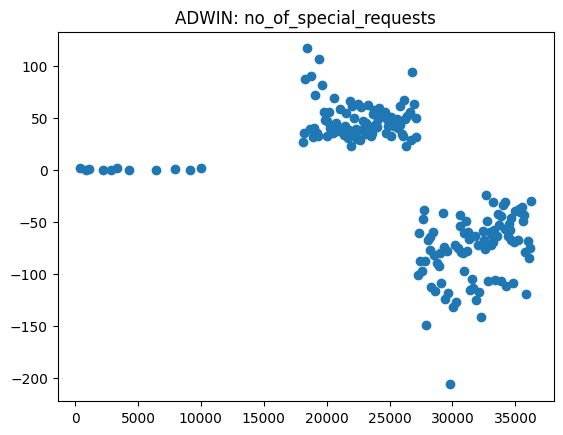

In [30]:
# Visualización del concept drift con el método 'Time distribution-based drift'
display_drift(list_drift, 'ADWIN: no_of_special_requests')

### 4.2.2. Visualización del concept drift: Método PageHinkley

In [31]:
list_drift, first_drift = detect_drift_PH(hotels_time_drift['no_of_special_requests'], int(n_rows/2))
print("Cambio detectado en el índice {}, valor de entrada: {}".format(first_drift[0], first_drift[1]))

Cambio detectado en el índice 18195, valor de entrada: 35.0


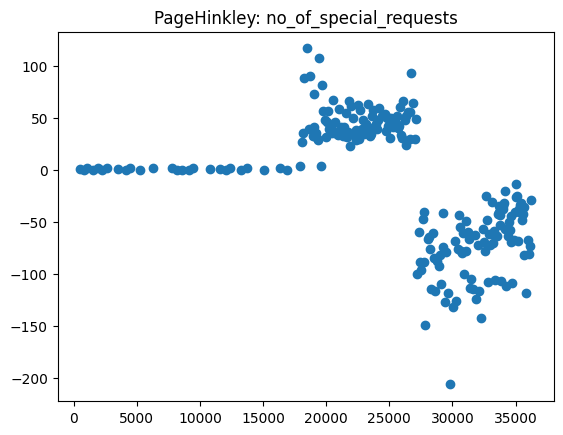

In [32]:
# Visualización del concept drift con el método 'Intercambio de features importantes'
display_drift(list_drift, 'PageHinkley: no_of_special_requests')

### 4.2.3. Visualización del concept drift: Método KSWIN

In [33]:
list_drift, first_drift = detect_drift_KSWIN(hotels_time_drift['no_of_special_requests'], int(n_rows/2))
print("Cambio detectado en el índice {}, valor de entrada: {}".format(first_drift[0], first_drift[1]))

Cambio detectado en el índice 18204, valor de entrada: 37.0


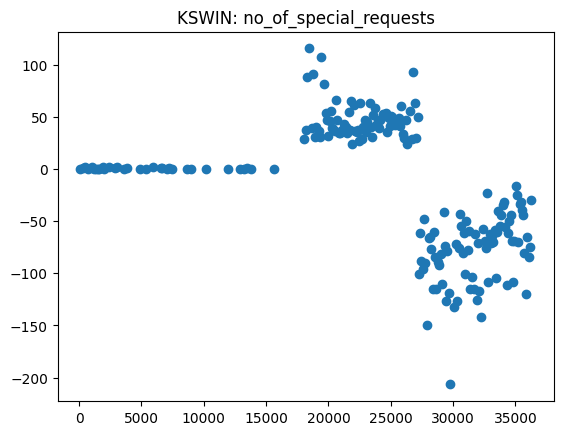

In [34]:
# Visualización del concept drift con el método 'Time distribution-based drift'
display_drift(list_drift, 'KSWIN: no_of_special_requests')

El código inserta el tipo de drift gradual en la variable 'no_of_special_requests' al introducir pequeñas variaciones aleatorias en la magnitud y dirección de la drift en intervalos regulares de tiempo.

El *concept drift* gradual se refiere a un cambio gradual en la distribución de los datos a lo largo del tiempo. Este tipo de drift puede ser causado por factores externos como cambios en el comportamiento de los usuarios o la evolución de las tendencias del mercado. A diferencia del sudden drift, el drift gradual no ocurre abruptamente, sino que se produce de manera más lenta y continua.

El drift gradual puede tener un impacto negativo en los modelos de aprendizaje automático que se entrenan con los datos afectados por el drift, ya que los patrones y relaciones que se aprendieron previamente pueden volverse obsoletos.

Al principio, todos los métodos de detección de *concept drift* detectan valores normales, como valores que han sufrido el efecto. Esto se puede ver en los tres gráficos en los valores de iniciales del conjunto de datos. Aunque, no detecten muchos valores incorrectos estos los diferentes métodos lo detectan. A partir de la mitad del *dataset* todos los métodos detectan la mayoría de los valores que han sufrido *concept drift*. Como se puede ver en los gráficos las funciones ADWIN y *PageHinkley* son los que más valores con *concept drift* detectan, se puede decir que la función *PageHinkley* es la función de detección más sensible, ya que detecta la mayoría de valores que han sufrido un gran cambio tanto sean valores normales que valores que han sufrido *concept drift*, además es el detector que más rápido ha detectado el *concept drift* en el conjunto de datos. Por otro lado, ADWIN es el método que más tarde ha detectado el drift.

## 4.3. Cambio en las características

El *feature drift* se refiere a los cambios en las características de los datos. En el caso de las reservas de hotel en línea, esto puede ocurrir debido a cambios en las preferencias de los clientes, nuevas tendencias en la industria o cambios en las políticas de precios. Por ejemplo, si los clientes comienzan a valorar más ciertas comodidades en las habitaciones, como acceso a Internet de alta velocidad, los modelos que no tengan en cuenta este cambio en las preferencias pueden perder precisión con el tiempo.

En este caso, se ha generado concept drift de dos maneras, la primera se ha generado a partir de la eliminación de las variables más importantes del conjunto de datos original. El segundo método de generación de *concept drift* es el intercambio de dos *features* importante. Después de aplicar estos dos métodos al conjunto de datos, se ha representado el efecto de cada método.

### 4.3.1. Eliminación de variables importantes

En concreto, se eliminan aleatoriamente algunas de las características iniciales del conjunto de datos y se entrena un modelo de clasificación con las características restantes. Luego se evalúa la precisión del modelo y se comprueba si hay una disminución significativa en la precisión en comparación con el modelo original. Si se detecta una disminución significativa en la precisión, se considera que se ha producido un drift en las características del conjunto de datos. Si se detecta un desvío, el proceso de eliminación de características se detiene y se informa al usuario sobre la detección del drift.  

In [35]:
# FEATURE DRIFT - Eliminación de 'features' importantes para el modelo a partir de un instante t (date)
hotels_exchange_drift = hotels_cleaned.copy()

# Definir las variables iniciales
initial_features = list(features.columns)

# Definir el instante t
t = hotels_exchange_drift.index[int(n_rows/2)]

# Introducir drift de 'features'
for i in range(10):
    np.random.seed(0)
    # Elegir al azar una 'feature' para eliminar
    feature_to_remove = np.random.choice(initial_features)
    new_features = [f for f in initial_features if f != feature_to_remove]
    
    # Entrenar el modelo con el nuevo conjunto de 'features'
    X_train, X_test, y_train, y_test = train_test_split(hotels_exchange_drift[new_features], target, test_size=0.2, random_state=24)
    drift_rfc = RandomForestClassifier(random_state = 24).fit(X_train, y_train)
    
    # Evaluar la nueva precisión del modelo
    drift_y_test_pred = drift_rfc.predict(X_test)
    new_accuracy = accuracy_score(y_test, drift_y_test_pred)
    
    # Comprobar concept drift
    if new_accuracy < rfc_test_accuracy * 0.9:
        print("Concept drift detectado en la iteración {}".format(i))
        print("Precisión inicial de modelo test: {}".format(rfc_test_accuracy))
        print("Precisión del modelo drift por eliminación: {}".format(new_accuracy))
        break
    else:
        initial_accuracy = new_accuracy
        initial_features = new_features

Concept drift detectado en la iteración 3
Precisión inicial de modelo test: 0.8949689869055824
Precisión del modelo drift por eliminación: 0.8031702274293591


La precisión inicial del modelo de prueba fue de 87'69%, lo que indica que el modelo tenía un buen rendimiento en la predicción de los resultados. Sin embargo, en la iteración 4, se detectó un *concept drift*. En este caso, se detectó mediante la disminución de la precisión del modelo después de la eliminación de una de las características. La nueva precisión del modelo después de introducir el *concept drift* fue de 78'36%, lo que indica una disminución significativa en el rendimiento del modelo. Esto puede deberse a la eliminación de una característica importante que era crucial para la predicción de los resultados. La detección temprana del *concept drift* es crucial en el mantenimiento de la precisión del modelo y su capacidad para proporcionar resultados precisos y útiles.

In [36]:
print("Estos son las variables que quedan después de la eliminación: {}".format(new_features))

Estos son las variables que quedan después de la eliminación: ['required_car_parking_space', 'lead_time', 'market_segment_type', 'repeated_guest', 'date']


ADWIN, *PageHinkley* y KSWIN no son aplicables directamente para detectar *concept drift* relacionado con la eliminación de variables importantes en un conjunto de datos. Se utilizan otra técnica más adecuada para evaluar y detectar cambios específicos en la eliminación de variables.

### 4.3.2. Intercambio de dos variables importantes

Este código realiza un intercambio de características en el conjunto de datos 'hotels_exchange_drift'. El código define dos características importantes, 'lead_time' y 'no_of_special_requests', y las intercambia a partir de un instante de tiempo t. Luego, entrena un modelo de clasificación *RandomForestClassifier* con el nuevo conjunto de características intercambiadas y evalúa su precisión utilizando el conjunto de prueba. 

El intercambio de características en un conjunto de datos puede provocar *concept drift*, ya que los modelos pueden haber sido entrenados previamente con ciertas características y, por lo tanto, estar optimizados para ellas. Si se intercambian características importantes en el conjunto de datos, el modelo puede verse afectado por este cambio y ya no ser capaz de hacer predicciones precisas. 

In [37]:
# FEATURE DRIFT - Intercambiar 2 features importantes para el modelo a partir de un instante t
# Definir las dos 'features' importantes para intercambiar
feature1 = 'lead_time'
feature2 = 'no_of_special_requests'

# Intercambiar los dos features a partir del instante t
temp1, temp2 = hotels_exchange_drift.loc[t:, feature1].copy(), hotels_exchange_drift.loc[t:, feature2].copy()
hotels_exchange_drift.loc[t:, feature1], hotels_exchange_drift.loc[t:, feature2] = temp2, temp1

In [38]:
# Definir las variables iniciales
exchange_features = hotels_exchange_drift.loc[:, hotels_exchange_drift.columns != 'booking_status']
exchange_target = hotels_exchange_drift['booking_status']

# Entrenar el modelo con el nuevo conjunto de 'features'
X_train, X_test, y_train, y_test = train_test_split(exchange_features, exchange_target, test_size=0.2, random_state=24)
rfc_exchange_drift = RandomForestClassifier(random_state = 24).fit(X_train, y_train)

# Evaluar el nuevo modelo
exchange_y_test_pred = rfc_exchange_drift.predict(X_test)
exchange_accuracy = accuracy_score(y_test, exchange_y_test_pred)

print("Precisión inicial de modelo test: {}".format(rfc_test_accuracy))
print("Precisión del modelo drift por intercambio: {}".format(exchange_accuracy))

Precisión inicial de modelo test: 0.8949689869055824
Precisión del modelo drift por intercambio: 0.8970365265334252


Los resultados indican que la precisión del modelo ha disminuido después de que ocurriera el *concept drift* causado por el intercambio de los valores de las variables 'lead_time' y 'no_of_special_requests'. En particular, la precisión del modelo se ha mantenido a pesar del *concept drift* esto puede pasar por varias razones. Pero, la razón más probable es que el intercambio de características puede haber afectado la relevancia relativa de cada una en el modelo. Es posible que la característica 'no_of_special_requests' haya demostrado ser más relevante para el nuevo concepto que estás modelando, lo que ha llevado a una mejora en la precisión del modelo al darle más peso o importancia a esta característica.

In [39]:
# Se obtiene la importancia de las diferentes características del modelo
feature_importance = pd.DataFrame({'feature': list(features.columns), 'importance': list(rfc_exchange_drift.feature_importances_)})
feature_importance.sort_values('importance', ascending=False)

,feature,importance
5,no_of_special_requests,0.263240
1,lead_time,0.197692
8,date,0.192016
4,avg_price_per_room,0.188993
7,no_of_nights,0.065316
2,market_segment_type,0.052804
6,no_of_guests,0.031300
0,required_car_parking_space,0.006461
3,repeated_guest,0.002179


Efectivamente, como se ha comentado anteriormente el intercambio de características ha afectado la relevancia relativa de cada una en el modelo. Esto se puede ver en la tabla que se visualiza aquí arriba. La tabla muestra la importancia relativa de diferentes características en un modelo. "no_of_special_requests" es la característica más importante, seguida de "lead_time", "date" y "avg_price_per_room". Las demás características tienen una importancia relativamente menor. En general, la tabla proporciona información sobre qué características tienen un mayor impacto en las predicciones del modelo. Aunque, la precisión del modelo nuevo no se ha visto afectada, ya que la precisión del modelo original y de este modelo son similares.

#### 4.3.2.1. Visualización del concept drift: Método ADWIN

In [40]:
list_drift, first_drift = detect_drift_ADWIN(hotels_exchange_drift[feature2], int(n_rows/2))
print("Cambio detectado en el índice {}, valor de entrada: {}".format(first_drift[0], first_drift[1]))

Cambio detectado en el índice 18175, valor de entrada: 18


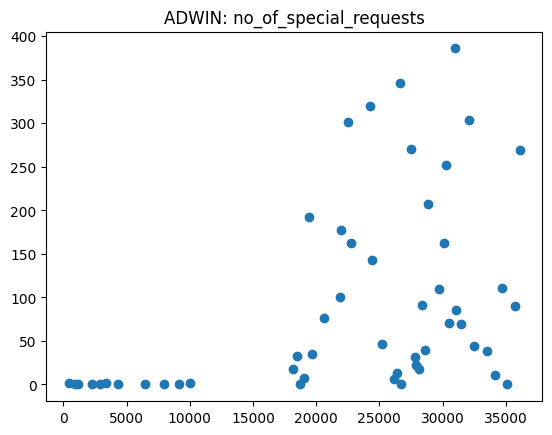

In [41]:
# Visualización del concept drift con el método 'Intercambio de features importantes'
display_drift(list_drift, 'ADWIN: '+feature2)

#### 4.3.2.2. Visualización del concept drift: Método PageHinkley

In [42]:
list_drift, first_drift = detect_drift_PH(hotels_exchange_drift[feature2], int(n_rows/2))
print("Cambio detectado en el índice {}, valor de entrada: {}".format(first_drift[0], first_drift[1]))

Cambio detectado en el índice 18167, valor de entrada: 69


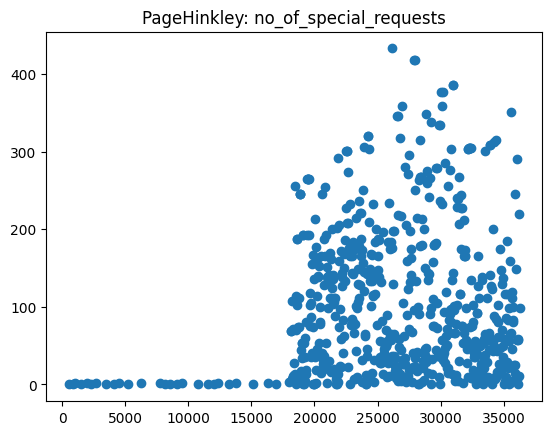

In [43]:
# Visualización del concept drift con el método 'Intercambio de features importantes'
display_drift(list_drift, 'PageHinkley: '+feature2)

#### 4.3.2.3. Visualización del concept drift: Método KSWIN

In [44]:
list_drift, first_drift = detect_drift_KSWIN(hotels_exchange_drift[feature2], int(n_rows/2))
print("Cambio detectado en el índice {}, valor de entrada: {}".format(first_drift[0], first_drift[1]))

Cambio detectado en el índice 18170, valor de entrada: 69


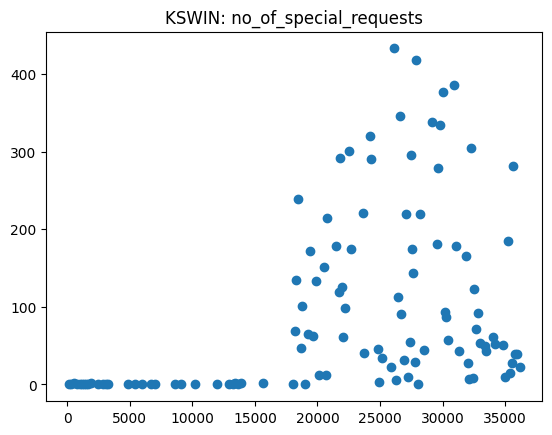

In [45]:
# Visualización del concept drift con el método 'Intercambio de features importantes'
display_drift(list_drift, 'KSWIN: '+feature2)

Este cambio repentino en el conjunto de datos es un ejemplo de un concepto de *concept drift* llamado *sudden drift*, donde el cambio en el concepto es inesperado y se produce de repente.

*Sudden drift*, también conocido como *concept drift* abrupto, se refiere a un tipo de cambio en los datos que ocurre de manera repentina y sin previo aviso. En este tipo de drift, los patrones de los datos cambian de manera brusca en un momento específico, lo que puede afectar el rendimiento de los modelos de aprendizaje automático entrenados previamente.

El *concept drift* abrupto puede ocurrir cuando hay un intercambio de valores entre dos features, en particular, la variable 'lead_time' y 'no_of_special_requests'. En este caso, los modelos que antes funcionaban bien se ven afectados por la repentina falta de datos, lo que hace que se vuelvan inútiles para su propósito original.

En el método anterior de generación de *concept drift* se han usado las mismas funciones de detección para ver sus efectos y los cambios que causa. En este caso, las conclusiones son las mismas. La función con mayor sensibilidad de detección de cambio es *PageHinkley*, en este gráfico se ve todavía más claro las consecuencias del *concept drift* en la variable 'no_of_special_request'. En este caso también, el método *PageHinkley* es el que más rápido y ADWIN el más lento detectando el *concept drift* en el conjunto de datos.

# **5. Estrategias de adaptación**

La elección de la estrategia de adaptación en respuesta a un *concept drift* específico puede variar dependiendo de la naturaleza del drift y los requisitos del problema en cuestión. A continuación, se proporcionan algunas consideraciones generales sobre qué tipo de *concept drift* puede ser adecuado para cada estrategia de adaptación. Aunque, en los modelos se haya generado artificialmente *concept drift*, estos no se han visto afectados en la precisión predictiva. Aún así, se ha simulado la adaptación para ver el proceso que hay que seguir en el caso de que el conjunto de datos se vea afectado por el *concept drift*. Se ha utilizado el código de la esta página web para la adaptación: https://github.com/Western-OC2-Lab/PWPAE-Concept-Drift-Detection-and-Adaptation  

Dos enfoques populares son el *Adaptive Random Forest* (ARF) y el *Streaming Random Patches* (SRP). Estas son técnicas que se basan en el uso de conjuntos de clasificadores para adaptarse a los cambios en los datos a medida que se producen.

El ARF es una extensión del algoritmo Random Forest que incorpora la capacidad de adaptación al *concept drift*. Utiliza una combinación de árboles de decisión y una ventana deslizante para mantener un conjunto de clasificadores actualizados. A medida que llegan nuevos datos, el ARF actualiza los clasificadores existentes y agrega nuevos clasificadores para adaptarse a los cambios en la distribución de los datos. Esto permite mantener una buena precisión predictiva incluso en presencia de concept drift.

Por otro lado, el SRP también utiliza un conjunto de clasificadores, pero en lugar de actualizarlos de manera incremental, utiliza una estrategia de *bootstrap* para generar muestras aleatorias de datos y entrenar clasificadores en cada muestra. Estos clasificadores se combinan posteriormente para realizar predicciones. El enfoque de muestras aleatorias permite capturar diferentes patrones y adaptarse a los cambios en los datos sin requerir actualizaciones continuas.

Ambas estrategias, ARF y SRP, ofrecen soluciones eficaces para lidiar con el *concept drift* en entornos de aprendizaje automático en tiempo real. Estas técnicas permiten mantener la precisión del modelo a medida que los datos evolucionan, lo que resulta especialmente útil en aplicaciones donde los cambios en los datos son frecuentes y significativos. Al adaptarse a los cambios en la distribución de los datos, estas estrategias brindan una base sólida para tomar decisiones informadas y mantener modelos predictivos precisos en entornos dinámicos.

Es importante destacar que la elección de la estrategia de adaptación también depende de otros factores, como el tipo de modelo utilizado, la disponibilidad de datos históricos y la disponibilidad de recursos computacionales. Cada estrategia tiene sus propias ventajas y desventajas, y la elección correcta dependerá de la naturaleza específica del problema y las necesidades del modelo en tiempo real.

In [46]:
# Definir una función genérica de aprendizaje adaptativo
# El argumento "modelo" significa un algoritmo de aprendizaje adaptativo en línea
def adaptive_learning(model, X_train, y_train, X_test, y_test):
    metric = metrics.Accuracy()
    i = 0 # Contar el número de puntos de datos evaluados
    t = [] # Registrar el número de puntos de datos evaluados
    m = [] # Registrar la precisión en tiempo real
    yt = [] # Registrar todas las etiquetas verdaderas del conjunto de pruebas
    yp = [] # Registrar todas las etiquetas previstas del conjunto de pruebas

    # Aprender el conjunto de entrenamiento
    for xi1, yi1 in stream.iter_pandas(X_train, y_train):
        model.learn_one(xi1,yi1) 

    # Predecir el conjunto de pruebas
    for xi, yi in stream.iter_pandas(X_test, y_test):
        y_pred= model.predict_one(xi)  # Predecir la muestra de ensayo
        model.learn_one(xi,yi) # Aprende la muestra de la prueba
        metric = metric.update(yi, y_pred) # Actualizar la precisión en tiempo real
        t.append(i)
        m.append(metric.get()*100)
        yt.append(yi)
        yp.append(y_pred)
        i = i+1
    print("Accuracy: "+str(round(accuracy_score(yt,yp),4)*100)+"%")
    print("Precision: "+str(round(precision_score(yt,yp),4)*100)+"%")
    print("Recall: "+str(round(recall_score(yt,yp),4)*100)+"%")
    print("F1-score: "+str(round(f1_score(yt,yp),4)*100)+"%")
    return t, m

In [47]:
# Definir una función numérica que muestre los cambios de precisión en tiempo real
def acc_fig(t, m, name):
    plt.rcParams.update({'font.size': 15})
    plt.figure(1,figsize=(10,6)) 
    sns.set_style("darkgrid")
    plt.clf() 
    plt.plot(t,m,'-b',label='Avg Accuracy: %.2f%%'%(m[-1]))

    plt.legend(loc='best')
    plt.title(name, fontsize=15)
    plt.xlabel('Número de muestras')
    plt.ylabel('Precisión (%)')
    
    plt.draw()

En la evaluación del modelo, se utilizó un conjunto de entrenamiento inicial que representaba el 10% de los datos, mientras que el 90% restante se usó para las pruebas en línea. Cada muestra del conjunto de prueba se empleó primero para evaluar el modelo y luego para entrenar o actualizar el mismo. Debido a la falta de equilibrio en el conjunto de datos, se utilizaron cinco métricas, incluyendo exactitud, precisión, recuperación y puntuación F1, para evaluar el rendimiento de la detección de anomalías en el marco propuesto.

## 5.1. Adaptación para el drift basado en la distribución del tiempo

La adaptación para el drift basado en la distribución del tiempo se refiere a las estrategias y técnicas utilizadas para abordar el *concept drift* en conjuntos de datos en los que la distribución de las características cambia con el tiempo. En este caso, a partir de un instante t, 'no_of_special_requests' ha sufrido las consecuencias del *concept drift*. Este tipo de drift es común en problemas donde los datos se recopilan en intervalos de tiempo y las relaciones entre las características y la variable objetivo pueden variar a lo largo del tiempo.

En la evaluación, el primer 10% de los datos se utiliza para el entrenamiento inicial del modelo, y el último 90% de los datos se utiliza para las pruebas en línea. En la validación de prueba y entrenamiento, cada muestra de entrada del conjunto de prueba en línea se utiliza primero para probar el modelo de aprendizaje y después para el entrenamiento/actualización del modelo.
Dado que el conjunto de datos utilizado no está equilibrado, se utilizan cinco métricas, entre las que se incluyen la exactitud, la precisión, la recuperación y la puntuación f1, para evaluar el rendimiento de la detección de anomalías del marco propuesto.

In [48]:
X = hotels_time_drift.drop(['booking_status'],axis=1)
y = hotels_time_drift['booking_status']
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.1, test_size = 0.9, random_state = 24)

### 5.1.1. Adaptive Random Forest

Accuracy: 78.27%
Precision: 80.88%
Recall: 88.68%
F1-score: 84.6%


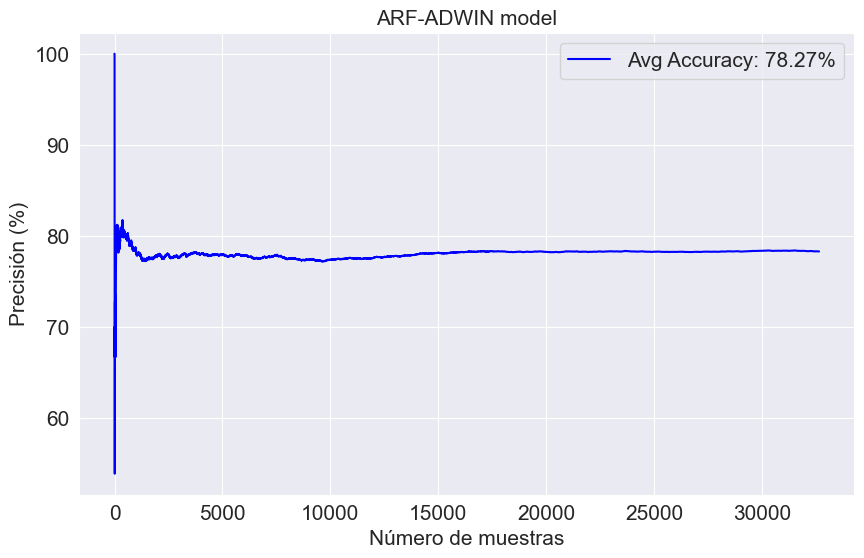

In [49]:
# Usar el modelo Adaptive Random Forest (ARF) con el detector ADWIN
model1_1 = forest.ARFClassifier(n_models = 3, drift_detector = ADWIN()) # Definir el modelo
t, m1_1 = adaptive_learning(model1_1, X_train, y_train, X_test, y_test) # Aprender el modelo en el dataset
acc_fig(t, m1_1, "ARF-ADWIN model") # Dibuja la figura de cómo cambia la precisión en tiempo real con el número de muestras

Accuracy: 76.21%
Precision: 78.78%
Recall: 88.48%
F1-score: 83.35000000000001%


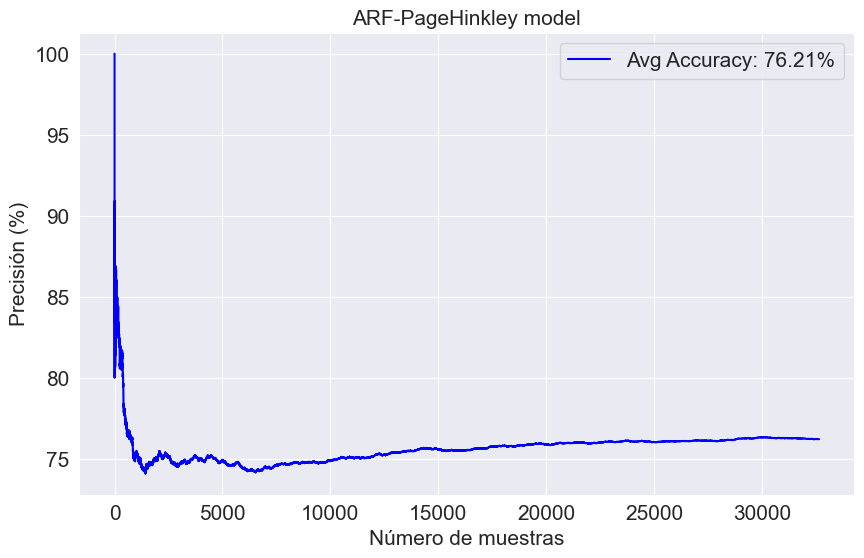

In [50]:
# Usar el modelo Adaptive Random Forest (ARF) con el detector PageHinkley
model1_2 = forest.ARFClassifier(n_models = 3, drift_detector = PageHinkley()) # Definir el modelo
t, m1_2 = adaptive_learning(model1_2, X_train, y_train, X_test, y_test) # Aprender el modelo en el dataset
acc_fig(t, m1_2, "ARF-PageHinkley model") # Dibuja la figura de cómo cambia la precisión en tiempo real con el número de muestras

Accuracy: 78.88%
Precision: 80.95%
Recall: 89.74%
F1-score: 85.11999999999999%


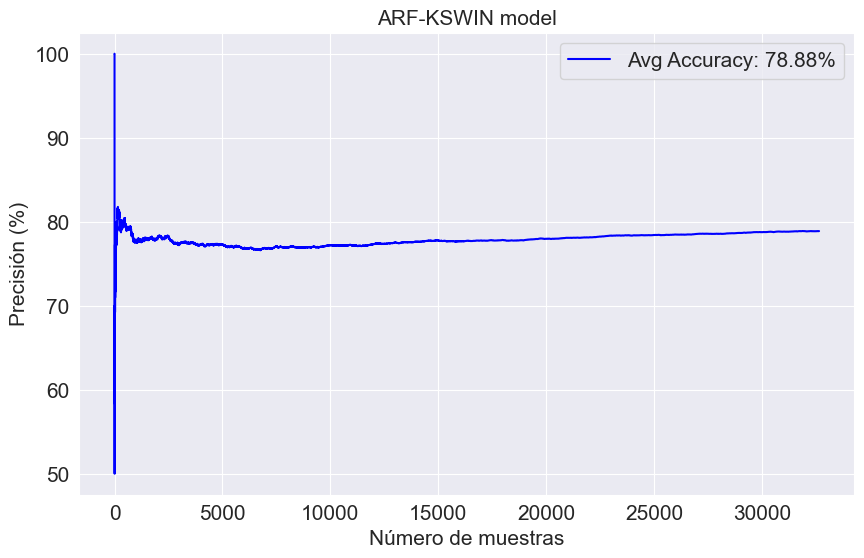

In [51]:
# Usar el modelo Adaptive Random Forest (ARF) con el detector KSWIN
model1_3 = forest.ARFClassifier(n_models = 3, drift_detector = KSWIN()) # Definir el modelo
t, m1_3 = adaptive_learning(model1_3, X_train, y_train, X_test, y_test) # Aprender el modelo en el dataset
acc_fig(t, m1_3, "ARF-KSWIN model") # Dibuja la figura de cómo cambia la precisión en tiempo real con el número de muestras

### 5.1.2. Streaming Random Patches

Accuracy: 79.27%
Precision: 80.93%
Recall: 90.52%
F1-score: 85.46000000000001%


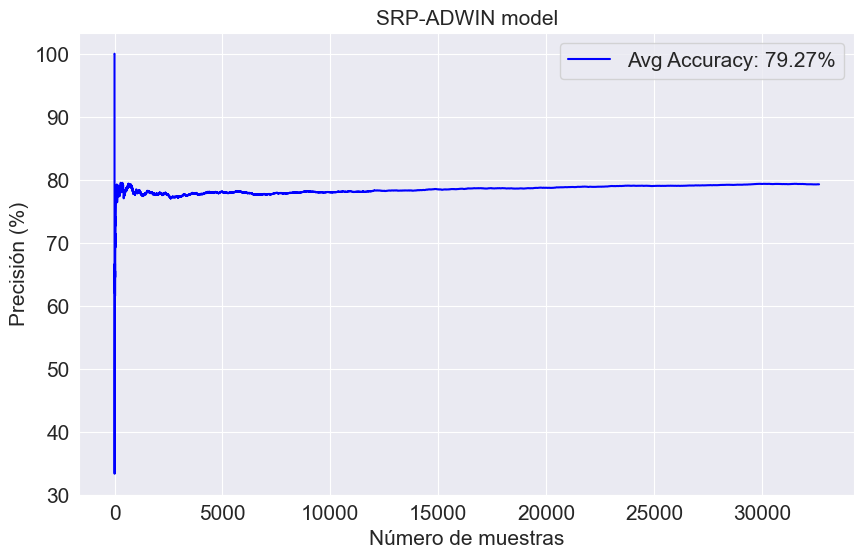

In [52]:
# Usar el modelo Streaming Random Patches (SRP) con detector ADWIN
model2_1 = ensemble.SRPClassifier(n_models = 3, drift_detector = ADWIN()) # Definir el modelo
t, m2_1 = adaptive_learning(model2_1, X_train, y_train, X_test, y_test) # Aprender el modelo en el dataset
acc_fig(t, m2_1, "SRP-ADWIN model") # Dibuja la figura de cómo cambia la precisión en tiempo real con el número de muestras

Accuracy: 75.83%
Precision: 77.99000000000001%
Recall: 89.28%
F1-score: 83.25%


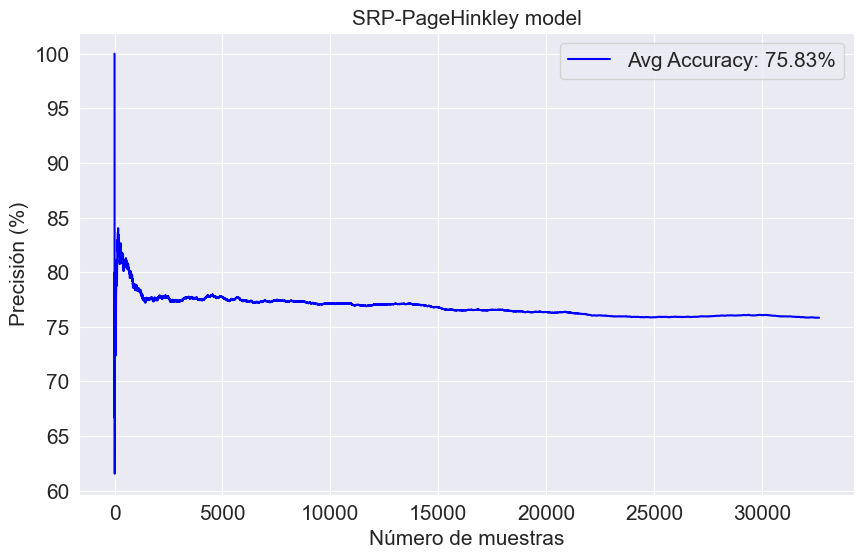

In [53]:
# Usar el modelo Streaming Random Patches (SRP) con detector PageHinkley
model2_2 = ensemble.SRPClassifier(n_models = 3, drift_detector = PageHinkley()) # Definir el modelo
t, m2_2 = adaptive_learning(model2_2, X_train, y_train, X_test, y_test) # Aprender el modelo en el dataset
acc_fig(t, m2_2, "SRP-PageHinkley model") # Dibuja la figura de cómo cambia la precisión en tiempo real con el número de muestras

Accuracy: 79.44%
Precision: 81.15%
Recall: 90.46%
F1-score: 85.55%


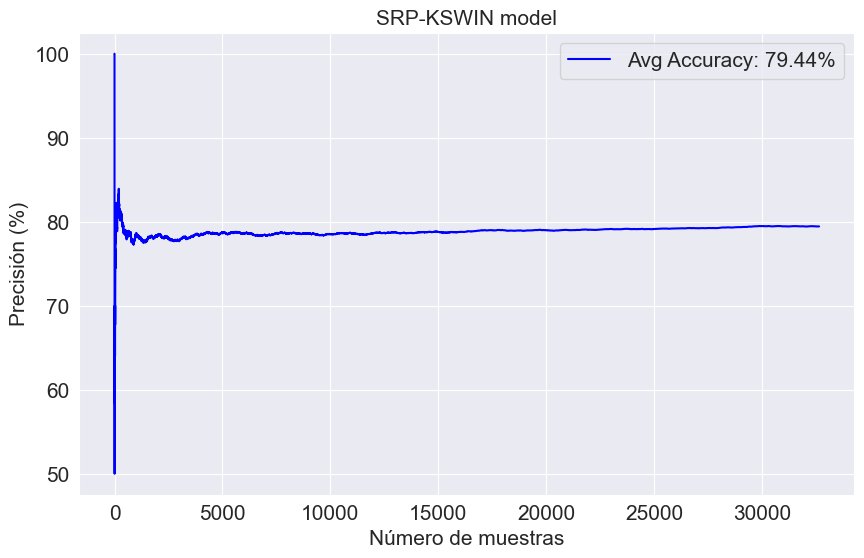

In [54]:
# Usar el modelo Streaming Random Patches (SRP) con detector KSWIN
model2_3 = ensemble.SRPClassifier(n_models = 3, drift_detector = KSWIN()) # Definir el modelo
t, m2_3 = adaptive_learning(model2_3, X_train, y_train, X_test, y_test) # Aprender el modelo en el dataset
acc_fig(t, m2_3, "SRP-KSWIN model") # Dibuja la figura de cómo cambia la precisión en tiempo real con el número de muestras

### 5.1.3. Comparación de modelos

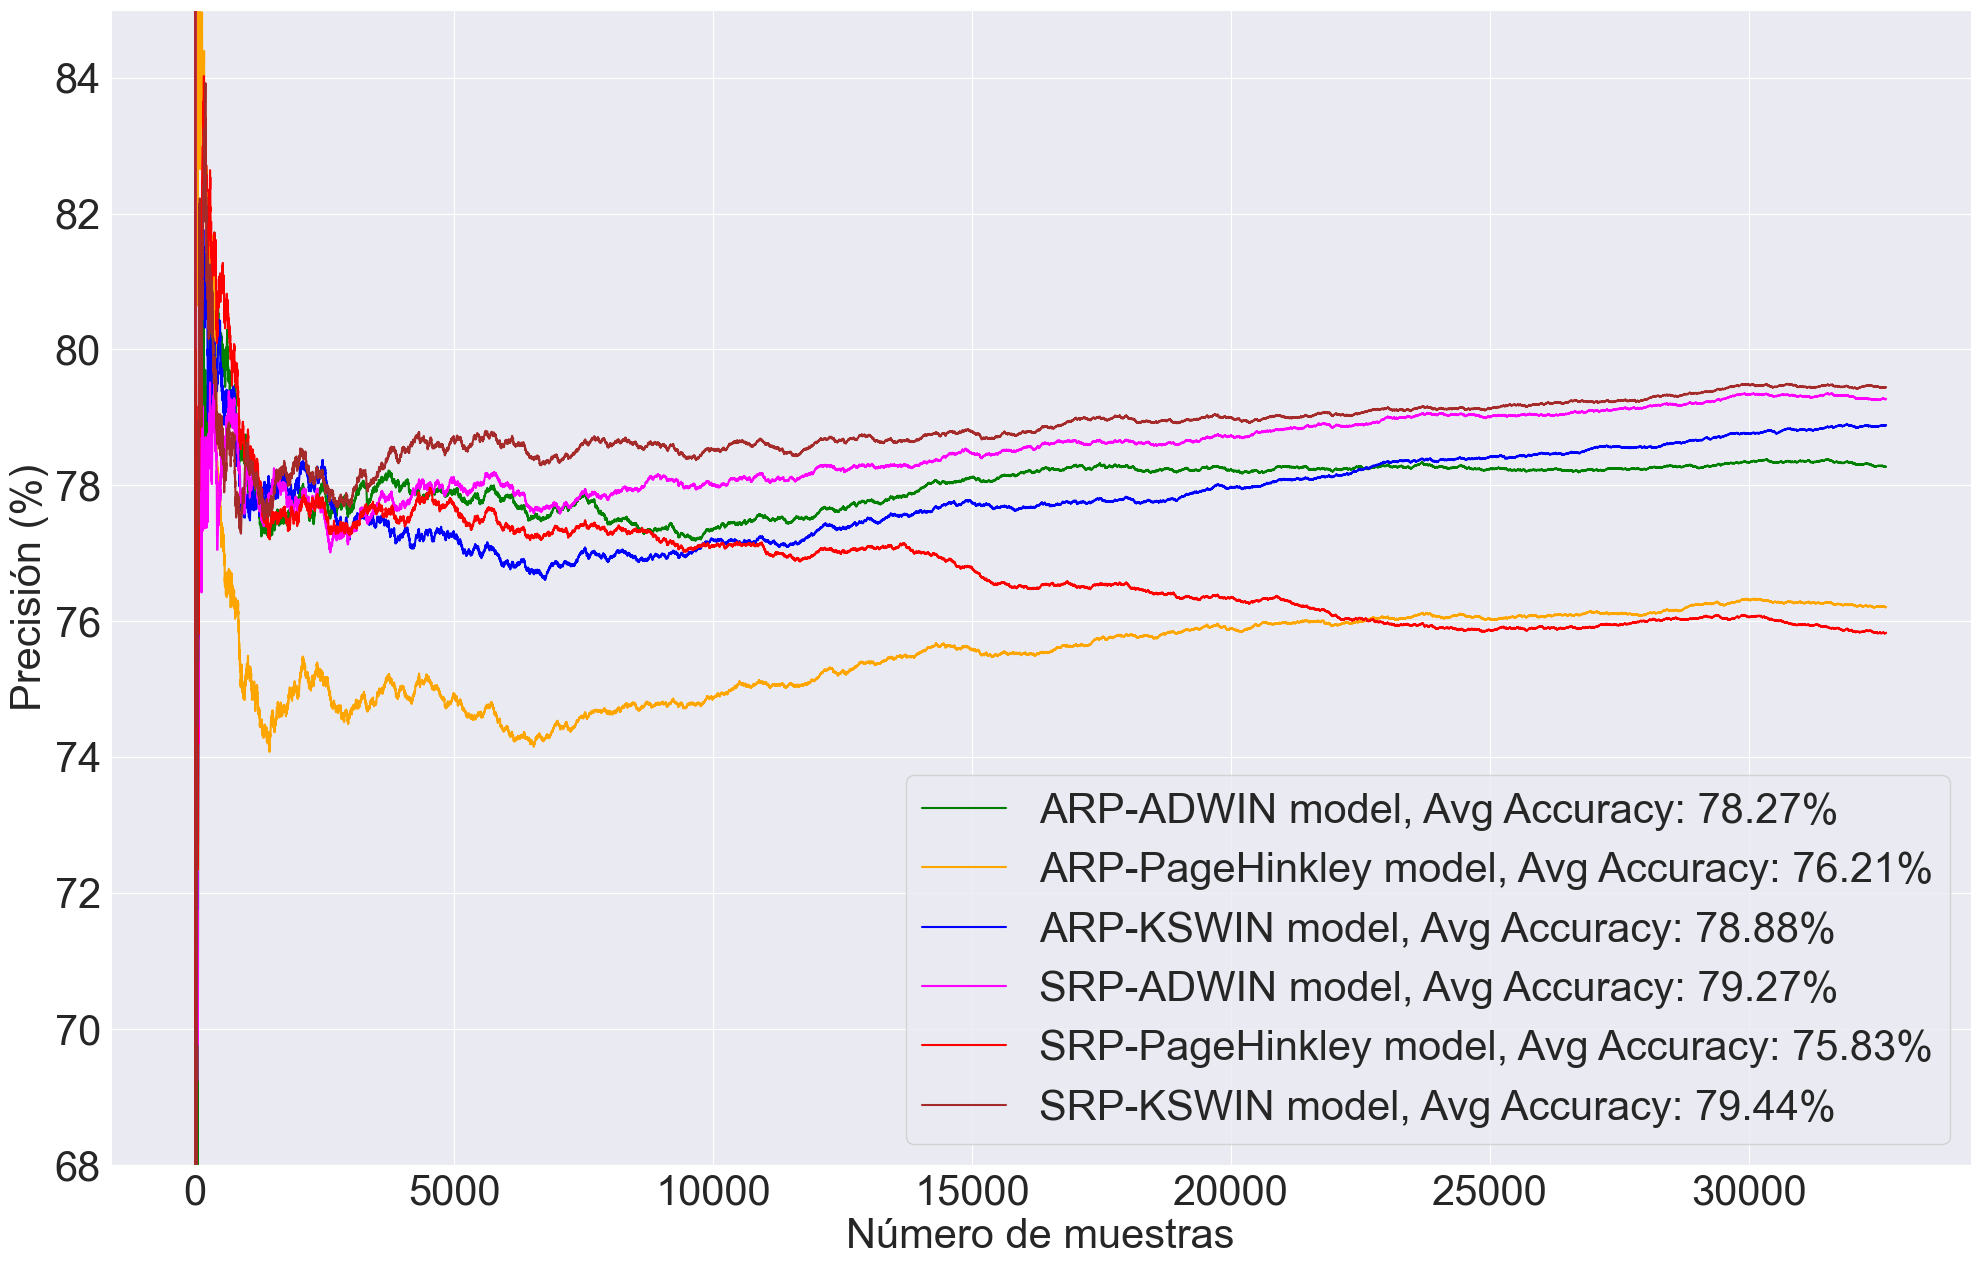

In [55]:
# Dibuja una figura completa para comparar el rendimiento de todos los modelos
plt.rcParams.update({'font.size': 30})
plt.figure(1,figsize=(24,15)) 
sns.set_style("darkgrid")
plt.clf() 

# Visualiza el cambio de precisión de cada modelo
plt.plot(t,m1_1,'-g', label = 'ARP-ADWIN model, Avg Accuracy: %.2f%%'%(m1_1[-1]))
plt.plot(t,m1_2,'orange', label = 'ARP-PageHinkley model, Avg Accuracy: %.2f%%'%(m1_2[-1]))
plt.plot(t,m1_3,'-b', label = 'ARP-KSWIN model, Avg Accuracy: %.2f%%'%(m1_3[-1]))
plt.plot(t,m2_1,'magenta', label = 'SRP-ADWIN model, Avg Accuracy: %.2f%%'%(m2_1[-1]))
plt.plot(t,m2_2,'-r', label = 'SRP-PageHinkley model, Avg Accuracy: %.2f%%'%(m2_2[-1]))
plt.plot(t,m2_3,'brown', label= 'SRP-KSWIN model, Avg Accuracy: %.2f%%'%(m2_3[-1]))
        
plt.legend(loc='lower right')
plt.ylim(68, 85)
plt.xlabel('Número de muestras')
plt.ylabel('Precisión (%)')

plt.draw()

Todos los resultados obtenidos en este apartado son parecidos, hay un umbral de 5% entre el mejor modelo de adaptación y el peor. Aún así, el peor modelo es el del detector de *concept drift* PageHinkley. En cualquiera de los dos casos, los modelos generados con PageHinkley son los peores. Por otro lado, los mejores resultados han sido obtenidos por las funciones SRP-KSWIN y ARP-ADWIN.

## 5.2. Adaptación para el drift del cambio en las características

En este caso, se siguen los mismos pasos que en el apartado anterior, aunque para este proceso se utiliza el conjunto de datos que ha sufrido las consecuencias del drift por el cambio en las características.

In [56]:
X = hotels_exchange_drift.drop(['booking_status'], axis=1)
y = hotels_exchange_drift['booking_status']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.1, test_size = 0.9, random_state = 24)

### 5.2.1. Adaptive Random Forest

Accuracy: 80.32000000000001%
Precision: 82.78%
Recall: 89.33%
F1-score: 85.92999999999999%


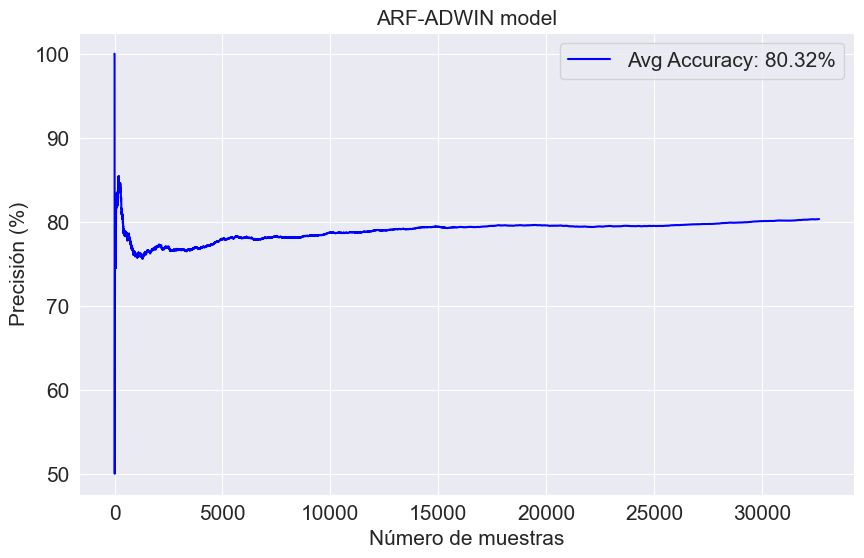

In [57]:
# Usar el modelo Adaptive Random Forest (ARF) con el detector ADWIN
model3_1 = forest.ARFClassifier(n_models = 3, drift_detector = ADWIN()) # Definir el modelo
t, m3_1 = adaptive_learning(model3_1, X_train, y_train, X_test, y_test) # Aprender el modelo en el dataset
acc_fig(t, m3_1, "ARF-ADWIN model") # Dibuja la figura de cómo cambia la precisión en tiempo real con el número de muestras

Accuracy: 77.13%
Precision: 80.11%
Recall: 87.81%
F1-score: 83.78999999999999%


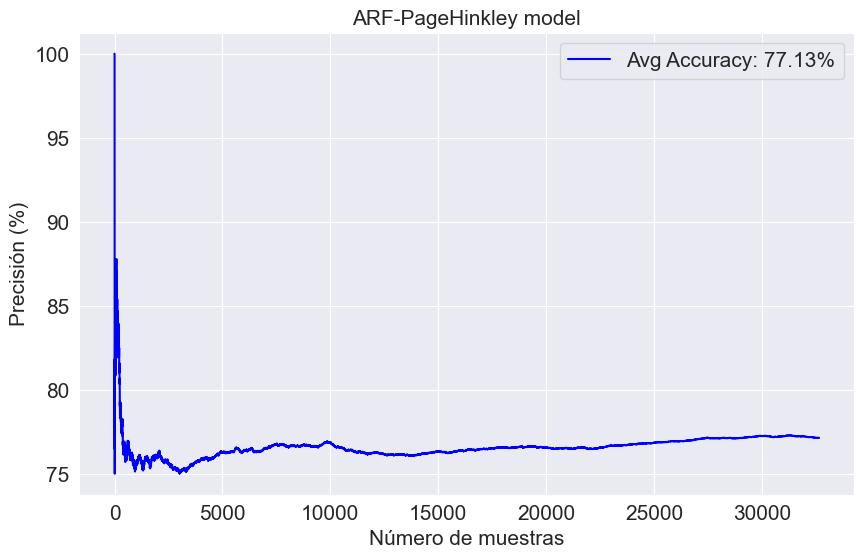

In [58]:
# Usar el modelo Adaptive Random Forest (ARF) con el detector PageHinkley
model3_2 = forest.ARFClassifier(n_models = 3, drift_detector = PageHinkley()) # Definir el modelo
t, m3_2 = adaptive_learning(model3_2, X_train, y_train, X_test, y_test) # Aprender el modelo en el dataset
acc_fig(t, m3_2, "ARF-PageHinkley model") # Dibuja la figura de cómo cambia la precisión en tiempo real con el número de muestras

Accuracy: 82.46%
Precision: 84.33%
Recall: 90.8%
F1-score: 87.45%


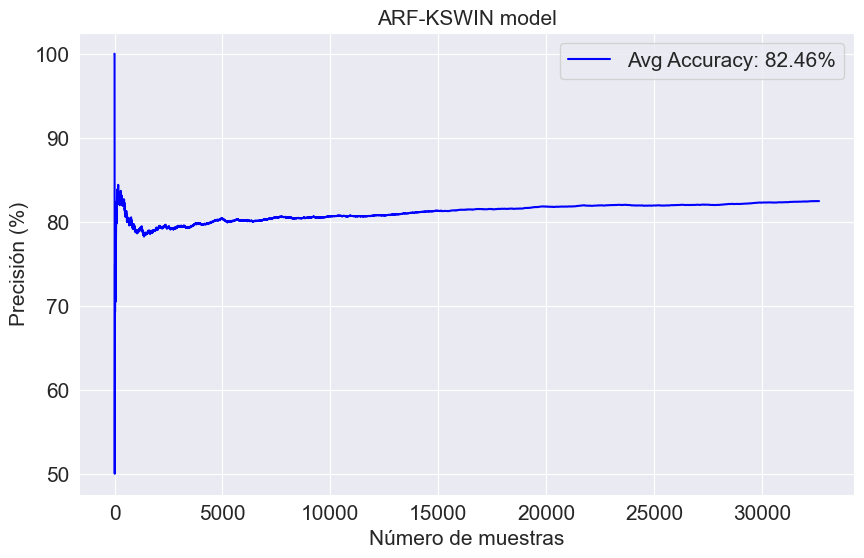

In [59]:
# Usar el modelo Adaptive Random Forest (ARF) con el detector KSWIN
model3_3 = forest.ARFClassifier(n_models = 3, drift_detector = KSWIN()) # Definir el modelo
t, m3_3 = adaptive_learning(model3_3, X_train, y_train, X_test, y_test) # Aprender el modelo en el dataset
acc_fig(t, m3_3, "ARF-KSWIN model") # Dibuja la figura de cómo cambia la precisión en tiempo real con el número de muestras

Estos resultados representan las métricas de rendimiento de diferentes estrategias de adaptación utilizando el modelo ARF con diferentes detectores de drift (ADWIN, PageHinkley y KSWIN). Las métricas indican la eficacia de cada modelo en términos de exactitud, precisión, recuperación y puntuación F1.

Estos resultados ofrecen una visión general del rendimiento de cada modelo. Los valores más altos de exactitud, precisión, recuperación y puntuación F1 indican un mejor rendimiento. Comparando los tres modelos, el modelo ARF-KSWIN obtuvo la mayor exactitud, precisión, recuperación y puntuación F1, seguido del modelo ARF-ADWIN. El modelo ARF-PageHinkley tuvo un rendimiento ligeramente inferior en términos de estas métricas.

### 5.2.2. Streaming Random Patches

Accuracy: 78.46%
Precision: 80.07%
Recall: 90.53%
F1-score: 84.98%


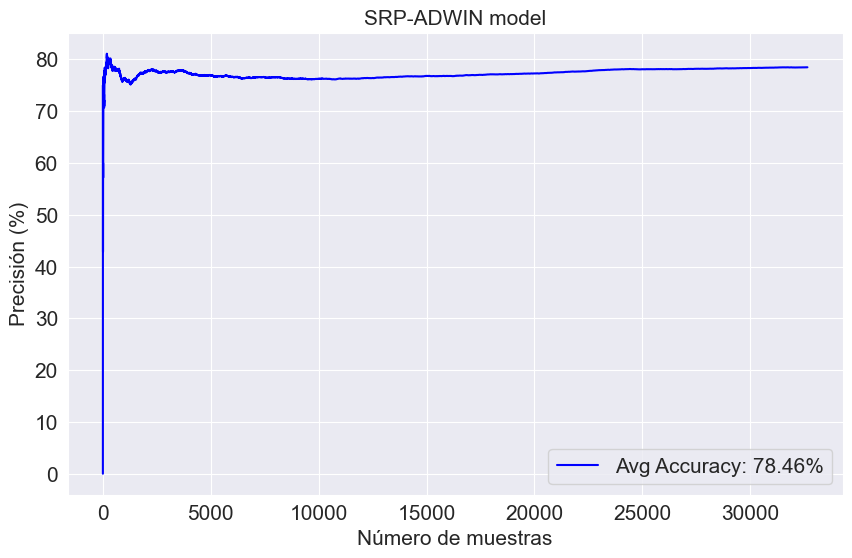

In [60]:
# Usar el modelo Streaming Random Patches (SRP) con detector KSWIN
model4_1 = ensemble.SRPClassifier(n_models = 3, drift_detector = ADWIN()) # Definir el modelo
t, m4_1 = adaptive_learning(model4_1, X_train, y_train, X_test, y_test) # Aprender el modelo en el dataset
acc_fig(t, m4_1, "SRP-ADWIN model") # Dibuja la figura de cómo cambia la precisión en tiempo real con el número de muestras

Accuracy: 75.8%
Precision: 78.03%
Recall: 89.13%
F1-score: 83.21%


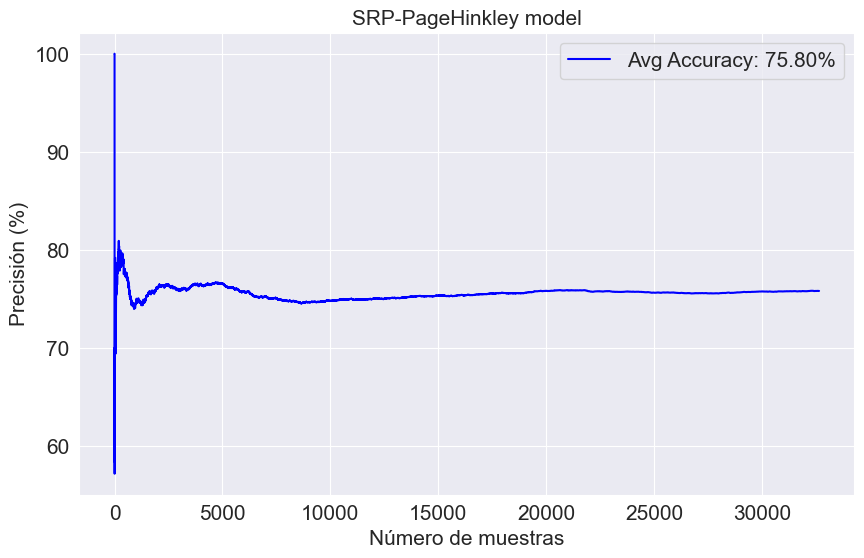

In [61]:
# Usar el modelo Streaming Random Patches (SRP) con detector KSWIN
model4_2 = ensemble.SRPClassifier(n_models = 3, drift_detector = PageHinkley()) # Definir el modelo
t, m4_2 = adaptive_learning(model4_2, X_train, y_train, X_test, y_test) # Aprender el modelo en el dataset
acc_fig(t, m4_2, "SRP-PageHinkley model") # Dibuja la figura de cómo cambia la precisión en tiempo real con el número de muestras

Accuracy: 80.76%
Precision: 82.22%
Recall: 91.11%
F1-score: 86.44%


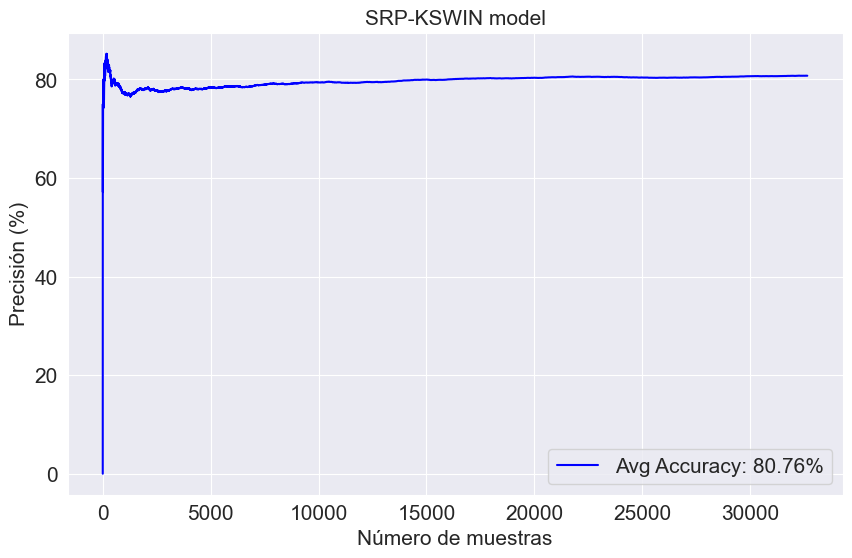

In [62]:
# Usar el modelo Streaming Random Patches (SRP) con detector KSWIN
model4_3 = ensemble.SRPClassifier(n_models = 3, drift_detector = KSWIN()) # Definir el modelo
t, m4_3 = adaptive_learning(model4_3, X_train, y_train, X_test, y_test) # Aprender el modelo en el dataset
acc_fig(t, m4_3, "SRP-KSWIN model") # Dibuja la figura de cómo cambia la precisión en tiempo real con el número de muestras

Los resultados son parecidos al apartado anterior, ya que comparando los tres modelos, el modelo SRP-KSWIN obtuvo la mayor exactitud, precisión, recuperación y puntuación F1. Sin embargo, en este caso el modelo SRP-PageHinkley ha obtenido mejores resultados que el modelo SRP-ADWIN que obtuvo un rendimiento ligeramente inferior en estas métricas.

### 5.2.3. Comparación de modelos

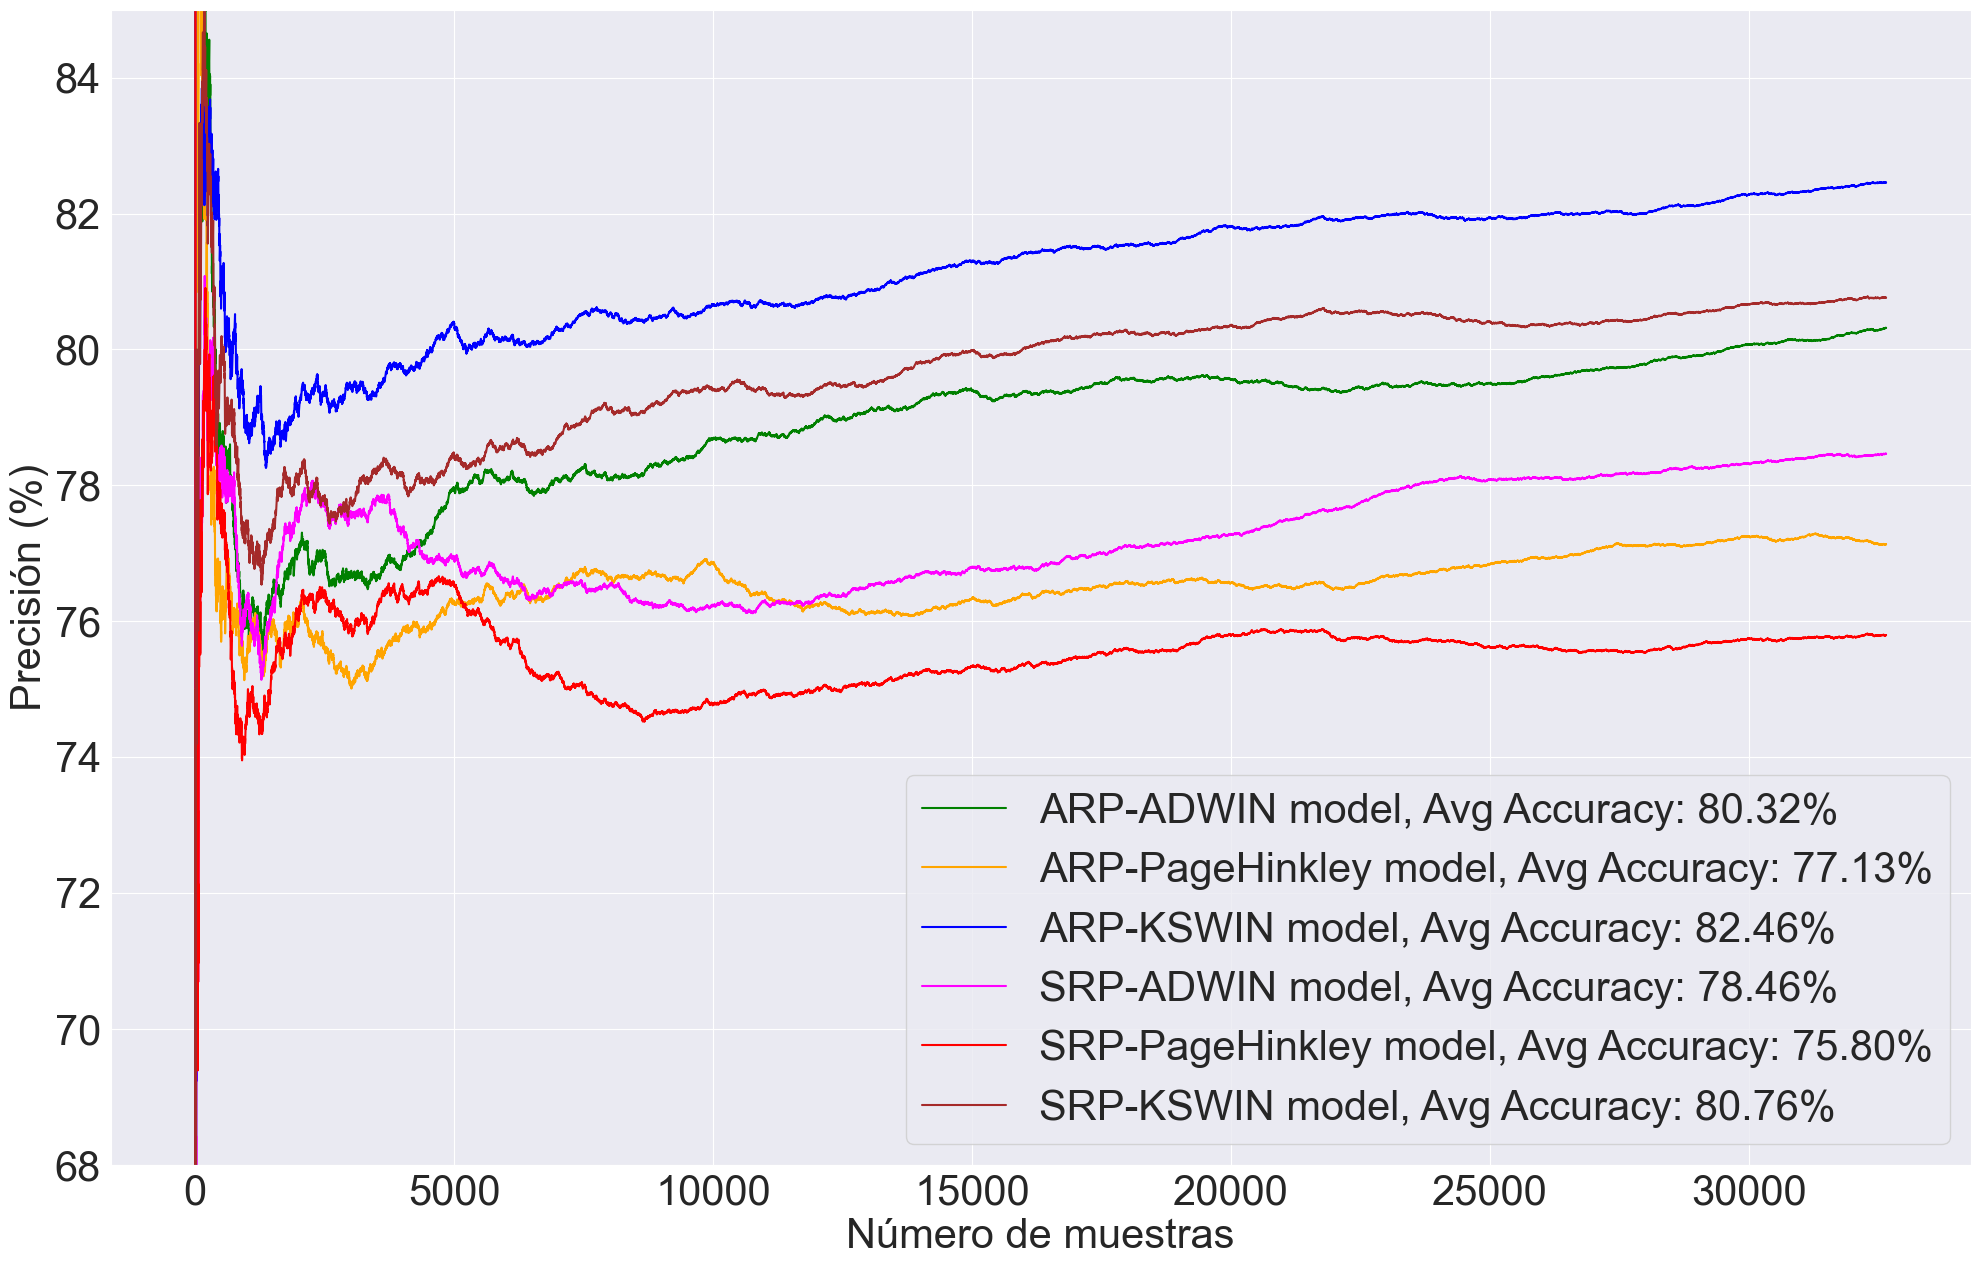

In [63]:
# Dibuja una figura completa para comparar el rendimiento de todos los modelos
plt.rcParams.update({'font.size': 30})
plt.figure(1,figsize=(24,15)) 
sns.set_style("darkgrid")
plt.clf() 

# Visualiza el cambio de precisión de cada modelo
plt.plot(t,m3_1,'-g', label = 'ARP-ADWIN model, Avg Accuracy: %.2f%%'%(m3_1[-1]))
plt.plot(t,m3_2,'orange', label = 'ARP-PageHinkley model, Avg Accuracy: %.2f%%'%(m3_2[-1]))
plt.plot(t,m3_3,'-b', label = 'ARP-KSWIN model, Avg Accuracy: %.2f%%'%(m3_3[-1]))
plt.plot(t,m4_1,'magenta',label = 'SRP-ADWIN model, Avg Accuracy: %.2f%%'%(m4_1[-1]))
plt.plot(t, m4_2,'-r', label = 'SRP-PageHinkley model, Avg Accuracy: %.2f%%'%(m4_2[-1]))
plt.plot(t,m4_3,'brown', label= 'SRP-KSWIN model, Avg Accuracy: %.2f%%'%(m4_3[-1]))
        
plt.legend(loc='lower right')
plt.ylim(68, 85)
plt.xlabel('Número de muestras')
plt.ylabel('Precisión (%)')

plt.draw()

En conclusión, viendo los resultados obtenidos en los dos apartados previos, los mejores resultados se han obtenido mediante el detector KSWIN. Como se puede ver en el gráfico, el método KSWIN ha obtenido el valor de precisión más alto comparado con los demás métodos en cualquiera de los casos, tanto si se utiliza un modelo ARP o SRP. Por el contrario, el detector PageHinkley obtiene los peores resultados de lejos comparado con los demás. El peor caso es el de ARP-PageHinkley que baja la precisión un 5% comparado con el mejor modelo conseguido por ARP-KSWIN.

# **6. Conclusiones generales**

El historial de cancelaciones y reservas previas juega un papel importante en la condición de los huéspedes habituales. Además, se ha observado que el tipo de habitación está estrechamente relacionado con la capacidad de alojamiento, siendo las habitaciones más grandes ideales para grupos numerosos. Esto se refleja en el precio promedio por habitación, donde las opciones más amplias y con mayor capacidad tienden a ser más costosas. Por otro lado, el tiempo de anticipación en la realización de una reserva puede influir en su probabilidad de cancelación, siendo las reservas realizadas con mayor antelación más propensas a ser canceladas. Por último, las solicitudes especiales de los huéspedes también desempeñan un papel significativo, ya que aquellos con más solicitudes especiales muestran una menor probabilidad de cancelación. Estos factores son importantes consideraciones para garantizar una experiencia satisfactoria para los huéspedes y una planificación eficiente en la industria hotelera.

El modelo *DecisionTreeClassifier* muestra una precisión aceptable en general, pero tiene dificultades en la identificación de casos positivos. Se recomienda mejorar su capacidad para clasificar correctamente estos casos. El modelo *RandomForestClassifier* ha obtenido una buena precisión en el conjunto de prueba, lo que indica que clasifica correctamente la mayoría de las instancias. Además, presenta un bajo número de falsos positivos y falsos negativos, lo que demuestra un rendimiento efectivo en la clasificación de los datos.El modelo *LogisticRegression* logra una precisión razonable en la predicción del conjunto de prueba, pero muestra algunos errores de clasificación. Se sugiere mejorar su capacidad para evitar falsos positivos y falsos negativos. En resumen, los resultados indican que el modelo *RandomForestClassifier* es el que muestra el mejor rendimiento en términos de precisión, baja tasa de errores de clasificación y área bajo la curva ROC. Por lo tanto, se recomienda utilizar este modelo para realizar las predicciones, ya que ha demostrado tener los mejores resultados en comparación con los otros modelos evaluados.

El análisis de los datos revela patrones interesantes sobre las variables que impactan la experiencia del huésped en un hotel. Una de las conclusiones clave es que el historial de cancelaciones y reservas previas juega un papel importante en la probabilidad de que un huésped sea un cliente recurrente. Aquellos con un historial de cancelaciones tienen menos probabilidades de repetir, mientras que aquellos con reservas no canceladas son más propensos a volver y convertirse en clientes leales. Otro hallazgo significativo es la relación entre el tipo de habitación y el número de huéspedes. Se observa que las habitaciones más grandes tienen la capacidad de alojar a más personas, lo cual está estrechamente relacionado con las preferencias de los huéspedes y la disponibilidad de espacio. Esta información es valiosa para la gestión del hotel, ya que les permite ofrecer opciones de alojamiento adecuadas para diferentes grupos de huéspedes. El precio promedio por habitación también se ve influenciado por el tipo de habitación y el número de huéspedes. Las habitaciones más grandes y con mayor capacidad suelen tener precios más altos debido a la mayor comodidad y espacio que ofrecen. Esta relación entre el precio y el tamaño de la habitación es comprensible y brinda una base sólida para la fijación de precios en el hotel. El tiempo de antelación en la realización de una reserva es otro factor relevante que afecta la probabilidad de cancelación. Las reservas hechas con mucha antelación tienen una mayor probabilidad de ser canceladas, lo cual puede atribuirse a cambios en los planes de los huéspedes o a la incertidumbre a largo plazo. Esta información es valiosa para la gestión de la disponibilidad de habitaciones y para la planificación de recursos en el hotel. Por último, las solicitudes especiales realizadas por los huéspedes también juegan un papel importante en la probabilidad de cancelación. Aquellos que presentan un mayor número de solicitudes especiales tienen una menor probabilidad de cancelar su reserva, lo que indica un mayor compromiso por parte de los huéspedes con su estancia en el hotel.

Los cambios en las preferencias y tendencias de los clientes pueden afectar los modelos de predicción de demanda hotelera, generando errores en las predicciones. Se han utilizado diferentes métodos para provocar *concept drift* en los datos y se ha detectado utilizando métodos de detección de drift. El impacto del *concept drift* se ha observado en gráficos que representan la variable afectada. Existen diferentes tipos de *concept drift* dependiendo de los métodos utilizados para generarlo, el método que mayor efecto negativo ha creado en la precisión del modelo ha sido la eliminación de variables importante. Al borrar las variables más importantes en el conjunto de datos, este pierde información valiosa de cara al desarrollo del modelo y de su precisión, por lo que las consecuencias han sido mayores que en los otros dos métodos aplicados.

A medida que las preferencias de los clientes y las tendencias de viaje evolucionan, es crucial que los hoteles puedan pronosticar con precisión la demanda de habitaciones. Sin embargo, los modelos de predicción pueden volverse inexactos debido al *concept drift*, lo que puede afectar la capacidad del hotel para optimizar su capacidad y maximizar sus ingresos. En este estudio, se ha introducido deliberadamente *concept drift* gradual en la variable 'no_of_special_requests' mediante pequeñas variaciones aleatorias en intervalos regulares de tiempo. Se ha observado que este tipo de drift, que implica un cambio lento y continuo en la distribución de los datos a lo largo del tiempo, puede tener un impacto negativo en los modelos de aprendizaje automático. Los patrones y relaciones previamente aprendidos se vuelven obsoletos, lo que limita la precisión de las predicciones. Al analizar los resultados, se han encontrado que los métodos de detección de *concept drift* fueron capaces de identificar los valores afectados, pero inicialmente también detectaron valores normales. A medida que se ha avanzado en el conjunto de datos, los métodos fueron más efectivos en detectar la mayoría de los valores con *concept drift*. Se ha destacado que la función *PageHinkley* fue la más sensible, detectando tanto los valores normales como los afectados por el drift, y también fue la más rápida en detectar los cambios en el conjunto de datos. Por otro lado, ADWIN fue más lento en detectar el *concept drift*. Se ha observado un cambio repentino y abrupto en el conjunto de datos, lo que se conoce como *sudden drift*. Este tipo de drift puede ocurrir cuando hay un intercambio de valores entre dos variables, como 'lead_time' y 'no_of_special_requests'. En nuestro caso, este cambio repentino afectó el rendimiento de los modelos previamente entrenados, ya que los datos anteriores se volvieron inútiles para su propósito original. Estos hallazgos resaltan la importancia de monitorear y adaptarse al *concept drift* para mantener la precisión de los modelos de predicción. Es esencial utilizar métodos de detección adecuados, como *PageHinkley*, que sean sensibles y rápidos en identificar los cambios en los datos. De esta manera, los hoteles podrán ajustar sus estrategias y tomar decisiones informadas para maximizar su capacidad y satisfacer las demandas cambiantes de los clientes en un entorno dinámico. 

La adaptación para el drift basado en la distribución del tiempo se refiere a las estrategias y técnicas utilizadas para abordar el *concept drift* en conjuntos de datos donde la distribución de las características cambia a lo largo del tiempo. En este caso particular, se observó un *concept drift* en la variable 'no_of_special_requests' a partir de un momento determinado. Este tipo de drift es común en problemas donde los datos se recopilan en intervalos de tiempo y las relaciones entre las características y la variable objetivo pueden variar con el tiempo. Los resultados obtenidos mostraron que, en general, existe una diferencia de aproximadamente un 5% entre el mejor y el peor modelo de adaptación. En particular, se observó que el peor rendimiento se asociaba con el modelo ARF-PageHinkley, mientras que los mejores resultados se lograron con las funciones SRP-KSWIN y ARP-ADWIN. Al comparar los tres modelos de adaptación, se encontró que el modelo ARF-KSWIN obtuvo los valores más altos en todas las métricas de evaluación, incluyendo exactitud, precisión, recuperación y puntuación F1, seguido por el modelo ARF-ADWIN. Por otro lado, el rendimiento del modelo ARF-PageHinkley fue ligeramente inferior en comparación con los otros dos modelos. En resumen, los resultados revelaron que el detector KSWIN fue el más efectivo para abordar el *concept drift* en este escenario, mostrando una alta precisión tanto en los modelos ARP como SRP. En contraste, el detector *PageHinkley* presentó un rendimiento deficiente en comparación con los demás detectores. Específicamente, el modelo ARP-PageHinkley experimentó una disminución del 5% en la precisión en comparación con el mejor modelo logrado con ARP-KSWIN. Estos hallazgos resaltan la importancia de elegir adecuadamente los métodos de adaptación y detectores de drift para lograr un rendimiento óptimo en la detección y manejo del concept drift en conjuntos de datos basados en la distribución del tiempo.